In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import importlib as im
import OrganizeData as DATA
im.reload(DATA)
import sero_survival as clear
im.reload(clear)
import establishment_alt2 as est
im.reload(est)
import drug_sep_OD as DATAds
im.reload(DATAds)

<module 'drug_sep_OD' from '/Users/aswin/polybox/Projects/Maela_project/drug_sep_OD.py'>

In [2]:
## Get all the Data
full_data, cocarriage_events, spec_dict = DATA.create_carriage_dataframe('Infant', 0.5)   # Dataframes with durations of carriage and co-carriage information
# illness_df = DATA.import_illness_data()         # Dataframe with each illness episode in children
# simple_drug_df = DATA.get_simple_drug_df(full_data, illness_df, treat_length=7)         # Drug use dataframe in Lifelines format
# effective_drug_df = DATA.effective_drug_plus_res(full_data, illness_df, treat_length=7)   # Effective drug use in Lifelines format
# ineffective_drug_df, D_minus_df = DATA.ineffective_drugs(full_data, illness_df, treat_length=7)  # Ineffective drug use and Resistance-without-drug in Lifelines format

/Users/aswin/polybox/Projects/Maela_project/OrganizeData.py:292: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  specdate=pd.to_datetime(output_df['specdate']))  # Converts the time to time-readable format


In [8]:
establishment_df = est.get_establishment_df(full_data, cocarriage_events)
estab_host_carriages_df = est.get_establishment_co_carriage_df(establishment_df, full_data)
e_effective_drug_df, e_ineffective_drug_df, e_res_without_drug = est.get_est_drug_res_info(establishment_df, full_data, illness_df, treat_length=7)

#### Visualize Data

In [ ]:
clear.plot_visualize_data(full_data, num=50, grid=1)

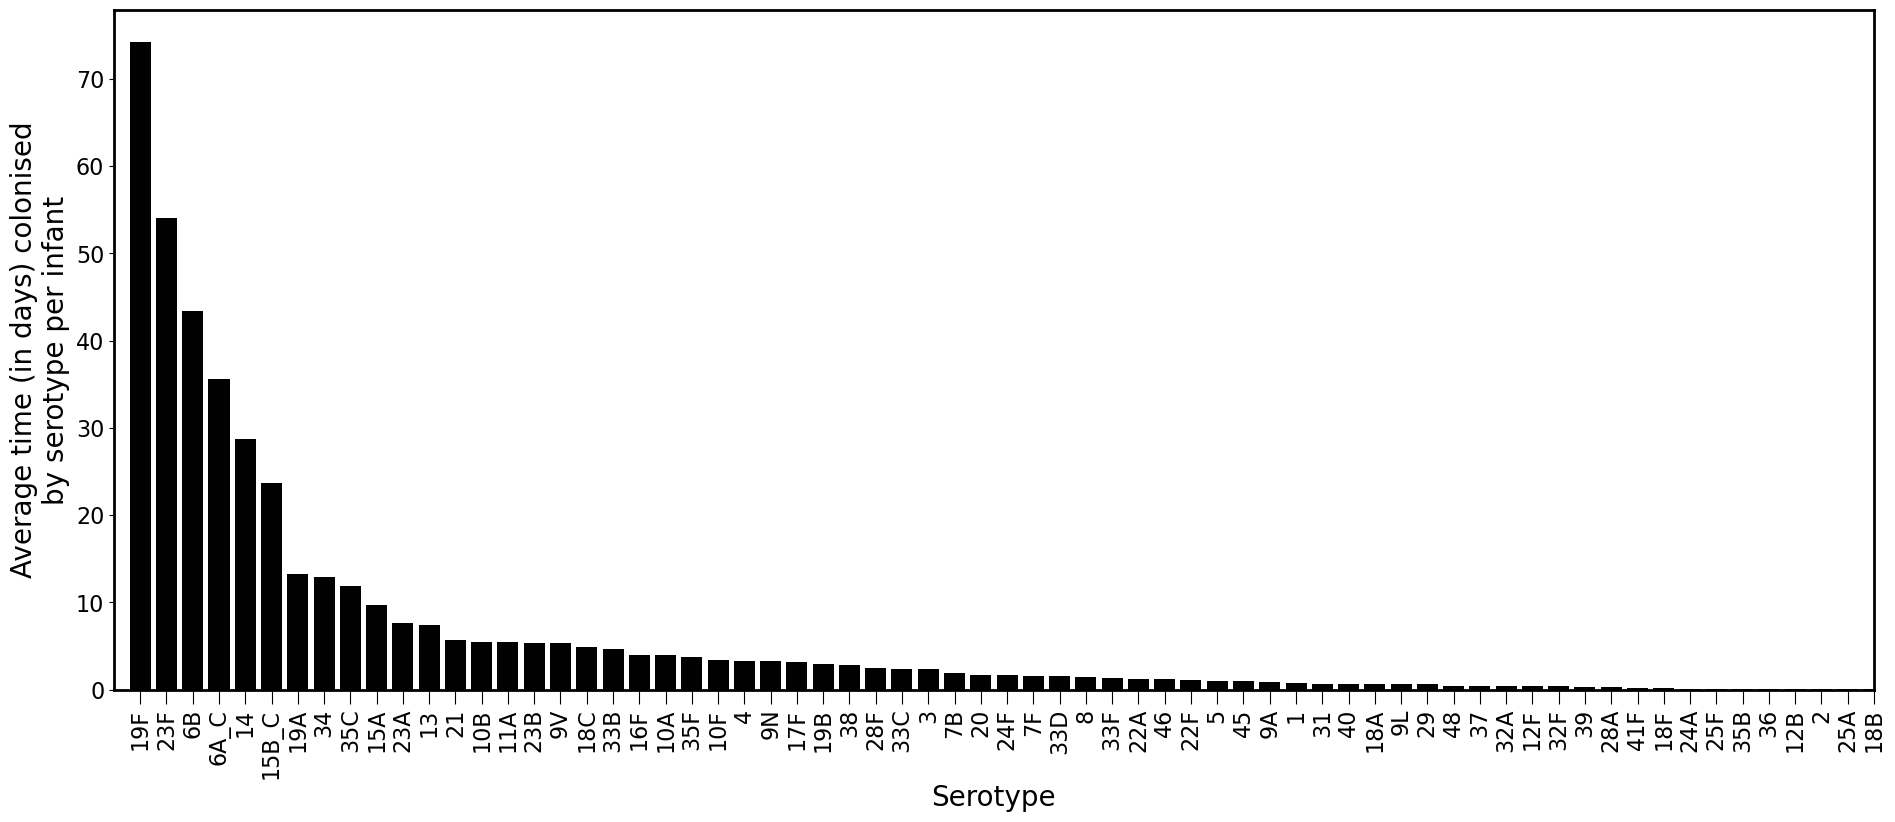

0

In [3]:
# Plot serotype distribution
data_df = full_data[['durations','serotype_carried']]
grouped_df = data_df.groupby('serotype_carried')['durations'].sum().reset_index()
grouped_df = grouped_df.sort_values(by='durations', ascending=False)

clear.plot_serotype_distribution_figures1(grouped_df)

#### Section S1: Simple Models of Pneumococcal epidemiology

Figure S2a: Duration of carriage determined by age and serotype

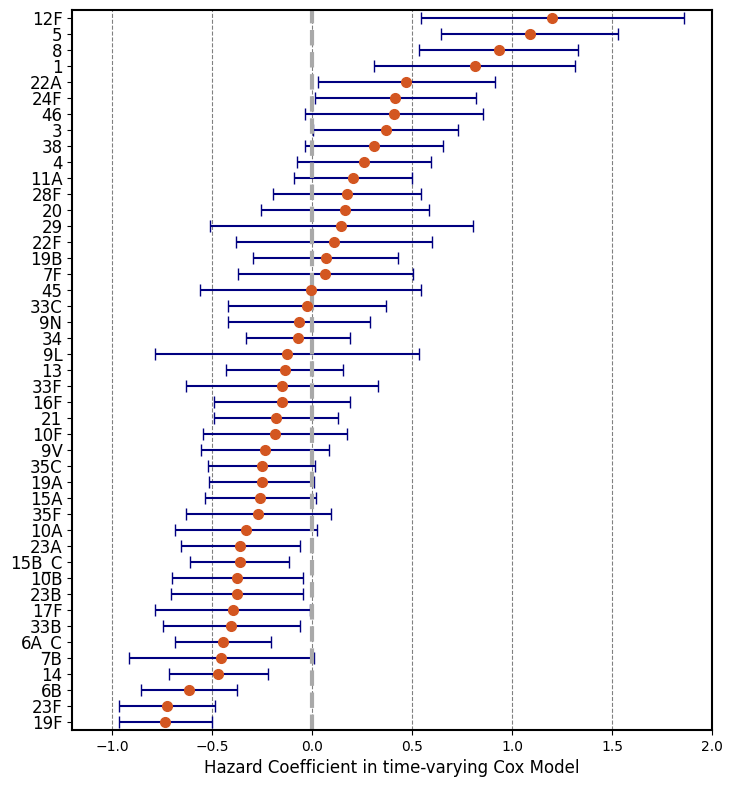

0

In [86]:
s2a_kph, s2a_model, df = clear.sero_survival_basic(full_data)

# PLOTTING:
params = s2a_model.params_.sort_values()
covariates_to_plot = params.index
y_labels = params.index
size = (8, 0.2*len(params))
xlim = [-1.2, 2]
clear.plot_all_covariate_model(s2a_model.summary, covariates_to_plot, y_labels, size, xlim, filename='figs2a.svg')

In [87]:
s2a_model.check_assumptions(df, p_value_threshold=0.05, show_plots=0)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 5411 total observations, 489 right-censored observations>
         test_name = proportional_hazard_test

---
            test_statistic    p  -log2(p)
1     km              0.17 0.68      0.56
      rank            3.40 0.07      3.94
10A   km              0.44 0.51      0.98
      rank            2.60 0.11      3.23
10B   km              0.02 0.89      0.17
      rank            1.34 0.25      2.01
10F   km              0.49 0.48      1.05
      rank            0.67 0.41      1.28
11A   km              0.06 0.80      0.32
      rank            0.38 0.54      0.90
12F   km              0.08 0.78      0.35
      rank            0.15 0.70      0.52
13    km              0.94 0.33      1.59
      rank            0.31 0.58      0.79
14    km              0.38 0.54      0.90
      rank            5.26 0.02      5.52
15A   km              2.21 0.14      2.87
      rank            0.60 0.44      1.18
15B_C km              1.39 0.24      2.07
      rank            1.56 0.21      2.24
16F   km              2.12 0.14      2.79
      rank            0.88 0.35      1.52
17F   km              0.02 0.89      0.18
      rank            2.34 0.13      2.99
19A   km              4.33 0.04      4.74
      rank            0.01 0.90      0.15
19B   km              6.35 0.01      6.41
      rank            0.83 0.36      1.47
19F   km              2.64 0.10      3.27
      rank            2.35 0.13      3.00
20    km              0.23 0.64      0.66
      rank            0.18 0.67      0.58
21    km              0.30 0.58      0.78
      rank            0.97 0.32      1.63
22A   km              0.00 0.94      0.08
      rank            1.66 0.20      2.34
22F   km              0.53 0.47      1.10
      rank            0.04 0.85      0.24
23A   km              0.12 0.73      0.45
      rank            0.15 0.70      0.51
23B   km              0.15 0.70      0.52
      rank            0.50 0.48      1.05
23F   km              3.37 0.07      3.91
      rank            5.72 0.02      5.90
24F   km              0.06 0.81      0.31
      rank            1.27 0.26      1.94
28F   km              0.61 0.43      1.21
      rank            0.99 0.32      1.65
29    km              0.08 0.78      0.35
      rank            0.02 0.88      0.19
3     km              0.59 0.44      1.17
      rank            0.25 0.62      0.70
33B   km              0.04 0.84      0.25
      rank            2.56 0.11      3.19
33C   km              0.09 0.76      0.39
      rank            2.68 0.10      3.30
33F   km              0.02 0.89      0.17
      rank            0.25 0.62      0.70
34    km              0.30 0.58      0.78
      rank            0.38 0.54      0.90
35C   km              1.23 0.27      1.90
      rank            0.93 0.33      1.58
35F   km              2.26 0.13      2.91
      rank            0.88 0.35      1.53
38    km              0.28 0.60      0.74
      rank            0.00 0.98      0.02
4     km              0.21 0.65      0.62
      rank            1.06 0.30      1.72
45    km              0.00 0.98      0.03
      rank            1.03 0.31      1.69
46    km              0.01 0.94      0.09
      rank            1.06 0.30      1.72
5     km              0.02 0.90      0.15
      rank            0.09 0.76      0.39
6A_C  km              3.36 0.07      3.90
      rank            0.03 0.87      0.20
6B    km              1.45 0.23      2.13
      rank            0.50 0.48      1.06
7B    km              1.71 0.19      2.39
      rank            0.02 0.90      0.15
7F    km              0.05 0.83      0.27
      rank            1.05 0.30      1.72
8     km              0.06 0.81      0.30
      rank            0.12 0.73      0.46
9L    km              0.00 0.97      0.04
      rank            0.00 0.96      0.06
9N    km              3.50 0.06      4.02
      rank            0.58



1. Variable '14' failed the non-proportional test: p-value is 0.0218.

   Advice: with so few unique values (only 2), you can include `strata=['14', ...]` in the call in
`.fit`. See documentation in link [E] below.

2. Variable '19A' failed the non-proportional test: p-value is 0.0374.

   Advice: with so few unique values (only 2), you can include `strata=['19A', ...]` in the call in
`.fit`. See documentation in link [E] below.

3. Variable '19B' failed the non-proportional test: p-value is 0.0117.

   Advice: with so few unique values (only 2), you can include `strata=['19B', ...]` in the call in
`.fit`. See documentation in link [E] below.

4. Variable '23F' failed the non-proportional test: p-value is 0.0168.

   Advice: with so few unique values (only 2), you can include `strata=['23F', ...]` in the call in
`.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifel

[]

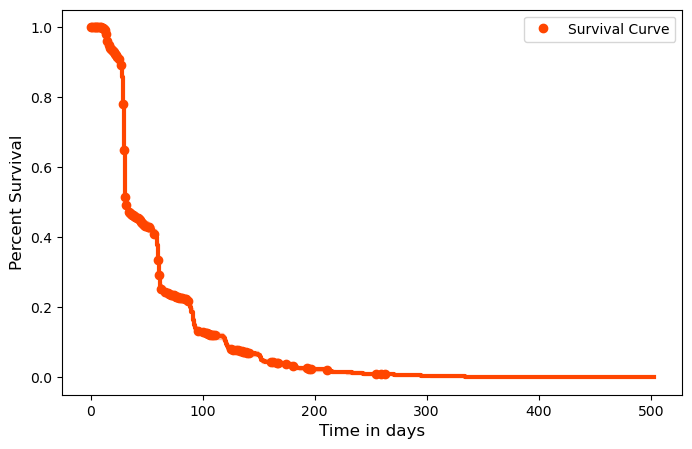

In [5]:
plt.figure(figsize=(8,5))
s2a_kph.plot_survival_function(show_censors=True, censor_styles={'ms': 6, 'marker': 'o'},
                               lw=3, color='orangered')
    #                             show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
plt.xlabel('Time in days', fontsize=12)
plt.ylabel('Percent Survival', fontsize=12)
plt.legend(['Survival Curve'])
plt.savefig('figs2aa.svg')
plt.show()

Fig S2b: Drug usage affects rate of clearance

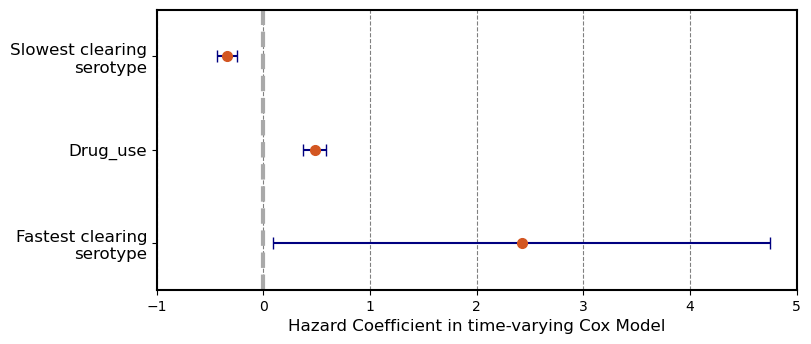

0

In [64]:
# s2b = clear.basic_survival_with_drugs(full_data, simple_drug_df)

# PLOTTING RESULT:
covariates_to_plot = ['18B', 'Drug_use', '19F']
y_labels = ['Fastest clearing\nserotype', 'Drug_use', 'Slowest clearing\nserotype']
size = (8,3.5)
xlim = [-1, 5]
clear.plot_all_covariate_model(s2b.summary, covariates_to_plot, y_labels, size, xlim, filename='figs2b.svg')

#### Section S2: Independence of carriage

Figure S3A: Setting independence of data points in the competition model: Effect of presence of competitor

In [3]:
ind_full_data = DATA.full_data_with_independence(full_data)

Iteration 1: norm_delta = 4.46e-01, step_size = 0.9500, log_lik = -17924.88391, newton_decrement = 1.80e+02, seconds_since_start = 2.7
Iteration 2: norm_delta = 7.35e-02, step_size = 0.9500, log_lik = -17792.03016, newton_decrement = 2.07e+01, seconds_since_start = 5.0
Iteration 3: norm_delta = 2.86e-02, step_size = 0.9500, log_lik = -17768.74977, newton_decrement = 2.49e+00, seconds_since_start = 7.5
Iteration 4: norm_delta = 8.55e-03, step_size = 1.0000, log_lik = -17766.02415, newton_decrement = 1.46e-01, seconds_since_start = 11.6
Iteration 5: norm_delta = 5.69e-04, step_size = 1.0000, log_lik = -17765.87226, newton_decrement = 5.75e-04, seconds_since_start = 22.5
Iteration 6: norm_delta = 2.40e-06, step_size = 1.0000, log_lik = -17765.87169, newton_decrement = 1.02e-08, seconds_since_start = 26.4
Iteration 7: norm_delta = 4.28e-11, step_size = 1.0000, log_lik = -17765.87169, newton_decrement = 3.23e-18, seconds_since_start = 29.8
Convergence completed after 7 iterations.


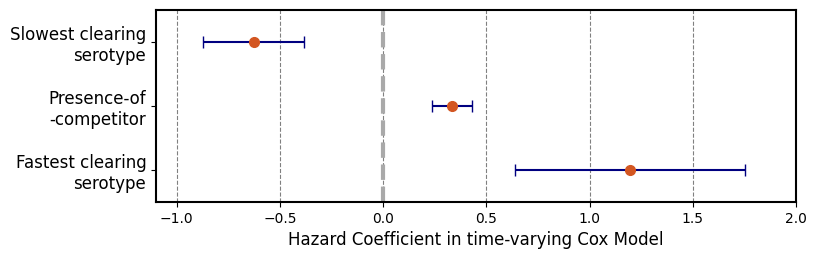

0

In [31]:
s3a = clear.cc_on_survival(ind_full_data, cocarriage_events, interaction=0)

# PLOTTING RESULT:
covariates_to_plot = ['sero_5', 'Co_carried', 'sero_19F']
y_labels = ['Fastest clearing\nserotype', 'Presence-of\n-competitor', 'Slowest clearing\nserotype']
size = (8,0.8*len(y_labels))
xlim = [-1.1, 2]
clear.plot_all_covariate_model(s3a.summary, covariates_to_plot, y_labels, size, xlim, filename='figs3a.svg')

Figure S3B: Independent data points: Effect of serotype hierarchies

Iteration 1: norm_delta = 4.28e-01, step_size = 0.9500, log_lik = -13575.74241, newton_decrement = 1.12e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 5.16e-02, step_size = 0.9500, log_lik = -13476.91392, newton_decrement = 3.69e+00, seconds_since_start = 0.1
Iteration 3: norm_delta = 5.73e-03, step_size = 0.9500, log_lik = -13473.11237, newton_decrement = 5.32e-02, seconds_since_start = 0.1
Iteration 4: norm_delta = 4.14e-04, step_size = 1.0000, log_lik = -13473.05877, newton_decrement = 2.48e-04, seconds_since_start = 0.2
Iteration 5: norm_delta = 7.49e-07, step_size = 1.0000, log_lik = -13473.05852, newton_decrement = 8.21e-10, seconds_since_start = 0.2
Convergence completed after 5 iterations.


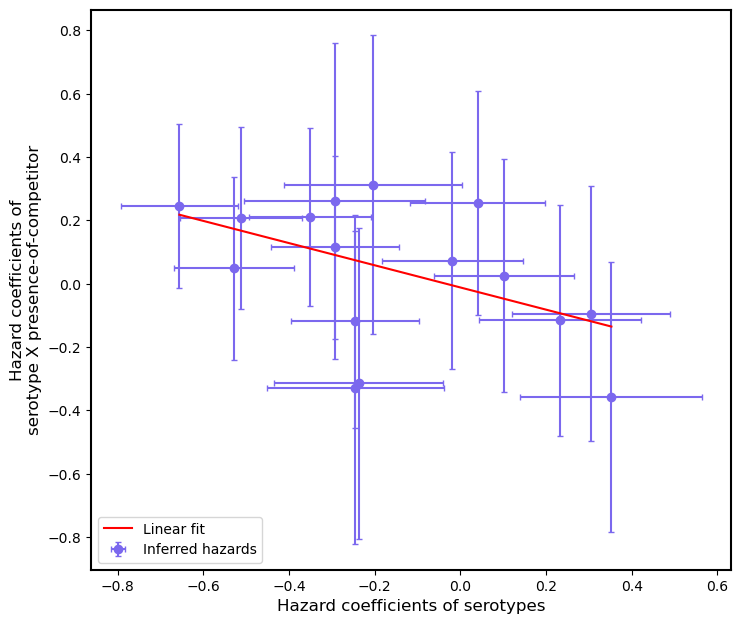

Slope of line is  -0.35016196966813345
CI =  -0.6279260984114078 -0.07239784092485912


In [9]:
s3b = clear.cc_on_survival(ind_full_data, cocarriage_events, interaction=1)
# Notes: Convergence issues: To solve the, remove serotypes with 40 or fewer occurrences
# and remove '15A', '21', '35F' to avoid convergence warning.

# PLOTTING RESULT:
reg_output = clear.plot_sero_effects(s3b.summary, size=(8,7), filename='figs3b.svg')
print("Slope of line is ", reg_output.beta[0])
print("CI = ", reg_output.beta[0]-1.96*reg_output.sd_beta[0],
      reg_output.beta[0]+1.96*reg_output.sd_beta[0])

Figure S3C: Independent data points: Effect of resident priority

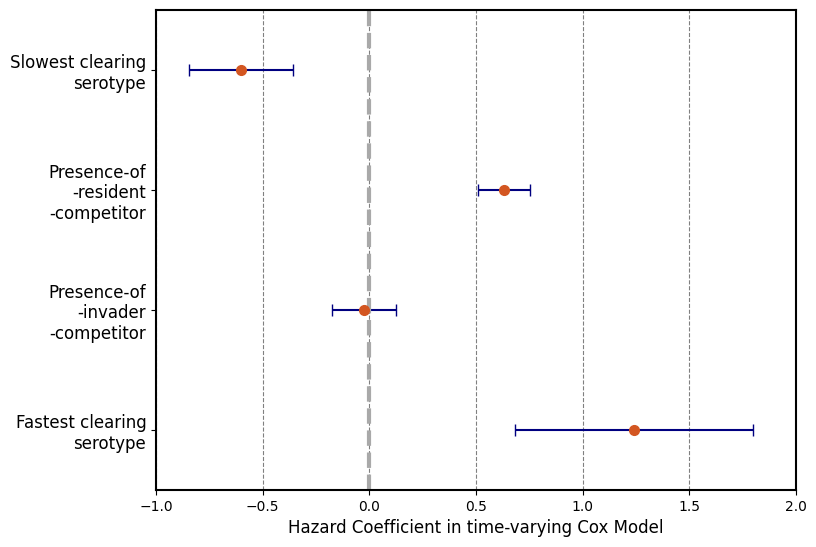

0

In [32]:
s3c = clear.cc_resident_priority_effect(ind_full_data, cocarriage_events)

# PLOTTING RESULT:
covariates_to_plot = ['5', 'cc_priority', 'cc_wo_priority', '19F']
y_labels = ['Fastest clearing\nserotype', 'Presence-of\n-invader\n-competitor', 'Presence-of\n-resident\n-competitor',
            'Slowest clearing\nserotype']
size = (8,1.5*len(y_labels))
xlim = [-1, 2]
clear.plot_all_covariate_model(s3c.summary, covariates_to_plot, y_labels, size, xlim, filename='figs3c.svg')

##### Generate the null distributions below

/Users/aswin/opt/miniconda3/envs/Maela_project/lib/python3.10/site-packages/lifelines/utils/__init__.py:1033: RuntimeWarning: There exist rows in your DataFrame with start and stop both at time 0:

        >>> df.loc[(df[start_col] == df[stop_col]) & (df[start_col] == 0)]

        These can be safely dropped, which should improve performance.

        >>> df = df.loc[~((df[start_col] == df[stop_col]) & (df[start_col] == 0))]
  warnings.warn(warning_text, RuntimeWarning)
/Users/aswin/opt/miniconda3/envs/Maela_project/lib/python3.10/site-packages/lifelines/utils/__init__.py:1033: RuntimeWarning: There exist rows in your DataFrame with start and stop both at time 0:

        >>> df.loc[(df[start_col] == df[stop_col]) & (df[start_col] == 0)]

        These can be safely dropped, which should improve performance.

        >>> df = df.loc[~((df[start_col] == df[stop_col]) & (df[start_col] == 0))]
  warnings.warn(warning_text, RuntimeWarning)
/Users/aswin/opt/miniconda3/envs/Maela_project/lib

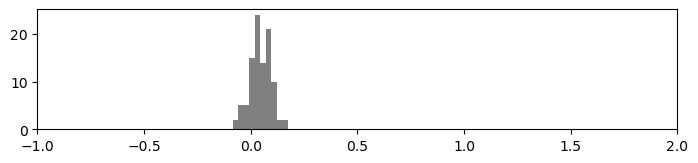

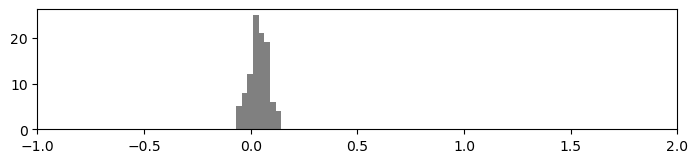

In [15]:
# null_dist_cc_priority, null_dist_cc_wo_priority = clear.permute_resident_effect_test(ind_full_data, times=100)

fig = plt.figure(figsize=(8,1.5))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.8])
ax.set_xlim(-1,2)
ax.hist(null_dist_cc_priority, bins=10, color='grey')
plt.savefig('figs3cnull1.svg', transparent=True)
plt.show()

# # ____________

fig = plt.figure(figsize=(8,1.5))
ax = fig.add_axes([0.2, 0.2, 0.8, 0.8])
ax.set_xlim(-1,2)
ax.hist(null_dist_cc_wo_priority, bins=8, color='grey')
plt.savefig('figs3cnull2.svg', transparent=True)
plt.show()

#### Section S3: Assumptions about start and end dates of carriage

In [10]:
mid_ratio = [0.25, 0.5, 0.75]
m_full_data, m_cocarriage_events = [], []

for mid in mid_ratio:
    m1, m2, m3 = DATA.create_carriage_dataframe('Infant', mid)
    m_full_data.append(m1)
    m_cocarriage_events.append(m2)


/Users/aswin/polybox/Projects/Maela_project/OrganizeData.py:288: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  specdate=pd.to_datetime(output_df['specdate']))  # Converts the time to time-readable format
/Users/aswin/polybox/Projects/Maela_project/OrganizeData.py:288: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  specdate=pd.to_datetime(output_df['specdate']))  # Converts the time to time-readable format
/Users/aswin/polybox/Projects/Maela_project/OrganizeData.py:288: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  specdate=pd.to_datetime(output_df['specdate']))  # Converts t

Figure S3E: Variation in presence-of-competitor (clearance), serotype effect, resident-competitor, and presence-of-competitor (establishment) with start assumption

/var/folders/gy/f2gltnkx69lf7ymcfvn7mgjw0000gn/T/ipykernel_859/373601969.py:86: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.1, wspace=0.3)


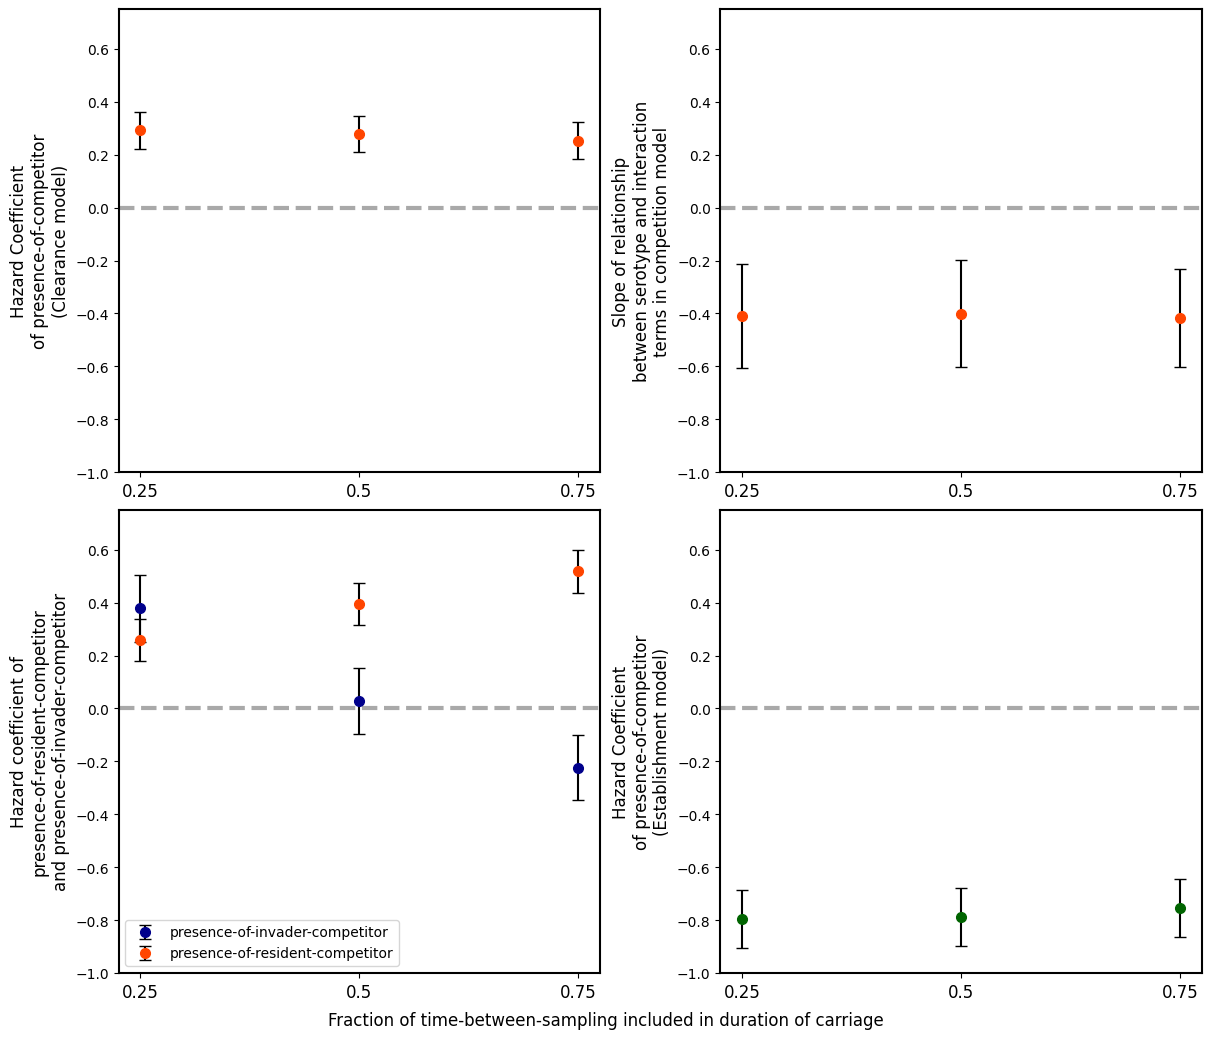

In [37]:
# mean, se = np.zeros((len(m_full_data), 5)), np.zeros((len(m_full_data), 5))

# for i in range(len(m_full_data)):
#     mi_cph = clear.cc_on_survival(m_full_data[i], m_cocarriage_events[i], interaction=0)
#     mean[i, 0], se[i, 0] = mi_cph.summary['coef']['Co_carried'], mi_cph.summary['se(coef)']['Co_carried']

# for i in range(len(m_full_data)):
#     mi_cph = clear.cc_on_survival(m_full_data[i], m_cocarriage_events[i], interaction=1)
#     output = clear.run_odr(mi_cph.summary)
#     mean[i, 1], se[i, 1] = output.beta[0], output.sd_beta[0]

# for i in range(len(m_full_data)):
#     mi_cph = clear.cc_resident_priority_effect(m_full_data[i], m_cocarriage_events[i])
#     mean[i, 2], se[i, 2] = mi_cph.summary['coef']['cc_priority'], mi_cph.summary['se(coef)']['cc_priority']
#     mean[i, 3], se[i, 3] = mi_cph.summary['coef']['cc_wo_priority'], mi_cph.summary['se(coef)']['cc_wo_priority']

# for i in range(len(m_full_data)):
#     est_df = est.get_establishment_df(m_full_data[i], m_cocarriage_events[i])
#     est_cc_df = est.get_establishment_co_carriage_df(est_df, m_full_data[i])
#     mi_cph = est.estab_survival_cox_basic(est_df, est_cc_df)
#     mean[i, 4], se[i, 4] = mi_cph.summary['coef']['Host_carry'], mi_cph.summary['se(coef)']['Host_carry']

#-------------------------------------------PLOTTING--------------------------------------------------------------------
fig, axs = plt.subplots(2,2, figsize=(12, 10), constrained_layout=1)
x_pos = ['0.25', '0.5', '0.75']

ax = axs[0, 0]
ax.errorbar(x_pos, mean[0:,0], yerr=1.96*se[0:,0],
            fmt='o', color='orangered', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)

# Plotting a horizontal line at x=0
ax.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax.set_xticks(np.arange(len(x_pos)))
ax.set_xticklabels(x_pos, fontsize=12, color='black')
ax.set_ylabel('Hazard Coefficient\nof presence-of-competitor\n(Clearance model)', fontsize=12)
ax.set_ylim(-1, 0.75)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)


ax2 = axs[0,1]
ax2.errorbar(x_pos, mean[0:,1], yerr=1.96*se[0:,1],
            fmt='o', color='orangered', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax2.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax2.set_xticks(np.arange(len(x_pos)))
ax2.set_xticklabels(x_pos, fontsize=12, color='black')
ax2.set_ylabel('Slope of relationship\nbetween serotype and interaction\nterms in competition model', fontsize=12)
ax2.set_ylim(-1, 0.75)
ax2.spines['top'].set_linewidth(1.5)
ax2.spines['right'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.spines['left'].set_linewidth(1.5)

ax3 = axs[1,0]
ax3.errorbar(x_pos, mean[0:,2], yerr=1.96*se[0:,2], label='presence-of-invader-competitor',
            fmt='o', color='darkblue', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax3.errorbar(x_pos, mean[0:,3], yerr=1.96*se[0:,3], label='presence-of-resident-competitor',
            fmt='o', color='orangered', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax3.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax3.set_xticks(np.arange(len(x_pos)))
ax3.set_xticklabels(x_pos, fontsize=12, color='black')
ax3.set_ylabel('Hazard coefficient of\npresence-of-resident-competitor\nand presence-of-invader-competitor', fontsize=12)
ax3.legend(loc='lower left')
ax3.set_ylim(-1, 0.75)
ax3.spines['top'].set_linewidth(1.5)
ax3.spines['right'].set_linewidth(1.5)
ax3.spines['bottom'].set_linewidth(1.5)
ax3.spines['left'].set_linewidth(1.5)

ax4 = axs[1,1]
ax4.errorbar(x_pos, mean[0:,4], yerr=1.96*se[0:,4],
            fmt='o', color='darkgreen', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax4.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax4.set_xticks(np.arange(len(x_pos)))
ax4.set_xticklabels(x_pos, fontsize=12, color='black')
ax4.set_ylabel('Hazard Coefficient\nof presence-of-competitor\n(Establishment model)', fontsize=12)
ax4.set_ylim(-1, 0.75)
ax4.spines['top'].set_linewidth(1.5)
ax4.spines['right'].set_linewidth(1.5)
ax4.spines['bottom'].set_linewidth(1.5)
ax4.spines['left'].set_linewidth(1.5)

fig.text(0.5, -0.02, 'Fraction of time-between-sampling included in duration of carriage', ha='center', fontsize=12)
plt.subplots_adjust(hspace=0.1, wspace=0.3)
plt.savefig('figs3e.svg', transparent=True)
plt.show()


#### Figure S4: Resident serotype affect establishment

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


['23B', 'Host_carry', '34', '24F', '19F', '4', '23A', '20', '33F', '33D', '23F', '10A', '15B_C', '17F', '13', '6B', '10B', '9V', '28F', '10F', '6A_C', '38', '19A', '11A', '33B', '35C', '3', '14', '16F', '33C', '35F', '15A', '46', '7B', '9N', '21', '7F', '19B', '45', '8']


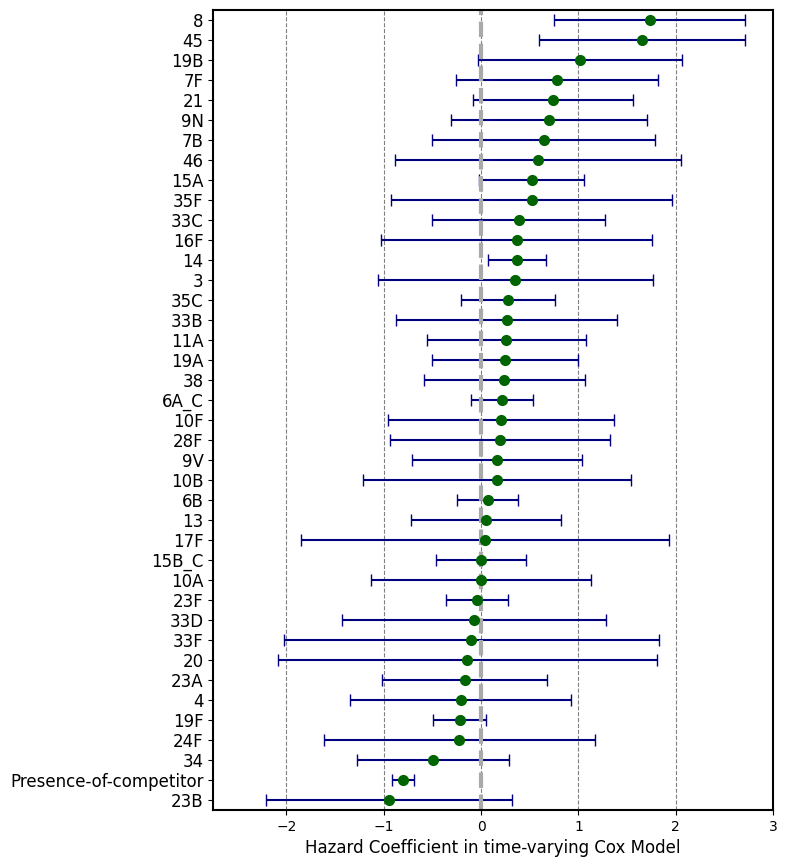

0

In [40]:
s4 = est.estab_survival_sero_competition(establishment_df, estab_host_carriages_df)

# PLOTTING THE RESULTS:
cov_sorted = s4.params_.sort_values()
covariates_to_plot = cov_sorted.index
y_labels = list(covariates_to_plot)
print(y_labels)
y_labels[1] = 'Presence-of-competitor'

size = (7,0.25*len(y_labels))
xlim = [-2.75, 3]
clear.plot_all_covariate_model(s4.summary, covariates_to_plot, y_labels, size, xlim, filename='figs4.svg')

In [95]:
# Likelihood ratio test
# s4null is model without competitor serotypes
test_statistic = 2*(s4.log_likelihood_ - s4null.log_likelihood_)
df = len(s4.summary) - len(s4null.summary)

from scipy.stats import chi2
p_value = chi2.sf(test_statistic, df)
print(p_value)

print('The p value is 1.2e-13')


1.2136146846379774e-13
The p value is 1.2e-13


#### Figure S5A: Effective and ineffective drugs on clearance (separated by drug type)

In [4]:
# Find how drug use corrected for resistance affects the clearance rate of strains
# Listed below are the strains for which convergence happens without issues

drug_list = ['AMOX/AMPICILLIN', 'ERYTHROMYCIN', 'CLOXACILLIN',
             'CLINDAMYCIN']  # For other drugs no good convergence
cox_list = []
# For each of these drugs, I create drug dataframes, and do the analysis 4.1

for d in drug_list:
    eff_df = DATAds.effective_drug_separated(full_data, illness_df, treat_length=7,
                            drug=d)
    ineff_df, rwd = DATAds.ineffective_drug_separated(full_data, illness_df, treat_length=7,
                               drug=d)
    try:
        cph = clear.effects_of_drugs(full_data, cocarriage_events, eff_df, ineff_df)
        cox_list.append(cph)
    except:
        cox_list.append('none')


Iteration 1: norm_delta = 4.02e-01, step_size = 0.9500, log_lik = -31313.46095, newton_decrement = 3.12e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 6.46e-02, step_size = 0.9500, log_lik = -31059.47231, newton_decrement = 2.03e+01, seconds_since_start = 0.6
Iteration 3: norm_delta = 1.82e-02, step_size = 0.9500, log_lik = -31037.40615, newton_decrement = 1.25e+00, seconds_since_start = 0.9
Iteration 4: norm_delta = 3.59e-03, step_size = 1.0000, log_lik = -31036.09486, newton_decrement = 3.02e-02, seconds_since_start = 1.2
Iteration 5: norm_delta = 1.82e-04, step_size = 1.0000, log_lik = -31036.06400, newton_decrement = 5.18e-05, seconds_since_start = 1.5
Iteration 6: norm_delta = 7.13e-07, step_size = 1.0000, log_lik = -31036.06395, newton_decrement = 7.56e-10, seconds_since_start = 1.8
Convergence completed after 6 iterations.
Iteration 1: norm_delta = 3.69e-01, step_size = 0.9500, log_lik = -31077.01386, newton_decrement = 2.78e+02, seconds_since_start = 2.7
Iteration 2: 

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_use'].var())

A very low variance means that the column Drug_use completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


Iteration 1: norm_delta = 3.69e-01, step_size = 0.9500, log_lik = -31077.01386, newton_decrement = 2.78e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 6.74e-02, step_size = 0.9500, log_lik = -30856.14872, newton_decrement = 2.20e+01, seconds_since_start = 0.8
Iteration 3: norm_delta = 1.90e-02, step_size = 0.9500, log_lik = -30832.17793, newton_decrement = 1.35e+00, seconds_since_start = 1.3
Iteration 4: norm_delta = 2.86e-03, step_size = 1.0000, log_lik = -30830.77579, newton_decrement = 2.37e-02, seconds_since_start = 1.7
Iteration 5: norm_delta = 4.79e-05, step_size = 1.0000, log_lik = -30830.75184, newton_decrement = 6.40e-06, seconds_since_start = 2.2
Iteration 6: norm_delta = 2.01e-08, step_size = 1.0000, log_lik = -30830.75184, newton_decrement = 1.11e-12, seconds_since_start = 2.8
Convergence completed after 6 iterations.


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Ineff_Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Ineff_Drug_use'].var())
>>> print(df.loc[~events, 'Ineff_Drug_use'].var())

A very low variance means that the column Ineff_Drug_use completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


Iteration 1: norm_delta = 3.70e-01, step_size = 0.9500, log_lik = -30982.29890, newton_decrement = 2.77e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 6.88e-02, step_size = 0.9500, log_lik = -30764.20636, newton_decrement = 2.26e+01, seconds_since_start = 0.5
Iteration 3: norm_delta = 2.03e-02, step_size = 0.9500, log_lik = -30739.51640, newton_decrement = 1.44e+00, seconds_since_start = 0.9
Iteration 4: norm_delta = 3.38e-03, step_size = 1.0000, log_lik = -30738.01508, newton_decrement = 2.78e-02, seconds_since_start = 1.3
Iteration 5: norm_delta = 8.56e-05, step_size = 1.0000, log_lik = -30737.98692, newton_decrement = 1.25e-05, seconds_since_start = 1.7
Iteration 6: norm_delta = 1.06e-07, step_size = 1.0000, log_lik = -30737.98690, newton_decrement = 1.43e-11, seconds_since_start = 2.5
Convergence completed after 6 iterations.


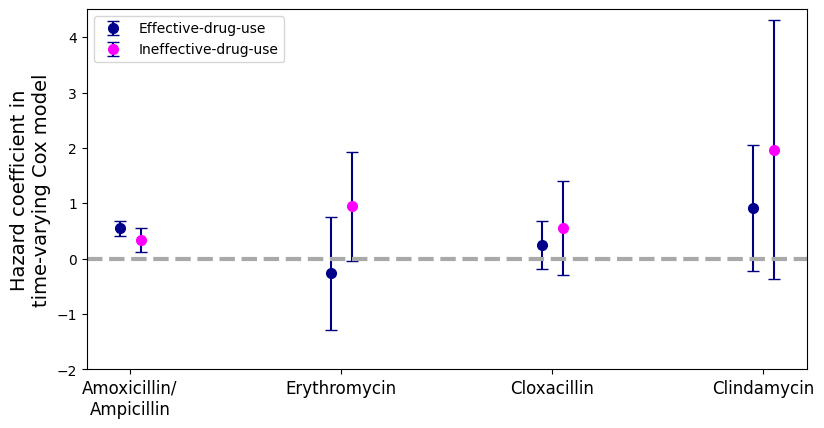

In [9]:

# -------------------------------------PLOTTING-------------------------------------
fig = plt.figure(figsize=(8,4))
# Add axes: [left, bottom, width, height]
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])

for i in range(len(cox_list[0:4])):
      if cox_list[i]=='none':
          continue
      summary_df = cox_list[i].summary[['coef', 'coef lower 95%', 'coef upper 95%']]  # Choose columns
      summary_df = summary_df.loc[['Drug_use', 'Ineff_Drug_use']]

      ax.errorbar(i-0.05, summary_df['coef']['Drug_use'],
                yerr=[summary_df['coef']['Drug_use'] - summary_df['coef lower 95%']['Drug_use']],
                fmt='o', color='darkblue', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)
      ax.errorbar(i+0.05, summary_df['coef']['Ineff_Drug_use'],
                yerr=[summary_df['coef']['Ineff_Drug_use'] - summary_df['coef lower 95%']['Ineff_Drug_use']],
                fmt='o', color='magenta', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)

ax.legend(['Effective-drug-use', 'Ineffective-drug-use'], loc=2)
ax.set_xticks(np.arange(len(cox_list[0:4])))
ax.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax.set_xticklabels(['Amoxicillin/\nAmpicillin', 'Erythromycin', 'Cloxacillin', 'Clindamycin'],
                   fontsize=12, color='black')
ax.set_ylabel('Hazard coefficient in\ntime-varying Cox model', fontsize=14)
ax.set_ylim(-2,4.5)
plt.savefig('figs5a.svg', transparent=True)
plt.show()

#### Figure S5B: Effective and ineffective drugs on clearance (separated by drug type)

In [41]:
drug_list = ['AMOX/AMPICILLIN']  # For other drugs no good convergence
cox_list2 = []
# For each of these drugs, I create drug dataframes, and do the analysis 4.2

for d in drug_list:
    eff_df, ineff_df, rwd = DATAds.est_drug_res_info_drug_separated(establishment_df, full_data, illness_df, treat_length=7,
                                     drug=d)
    try:
        cph = est.estab_survival_res_and_drugs(establishment_df, estab_host_carriages_df, eff_df,
                                       ineff_df)
        cox_list2.append(cph)
    except:
        cox_list2.append('none')


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.37e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 9.98e+01, seconds_since_start = 0.3
Iteration 2: norm_delta = 6.02e-03, step_size = 0.9500, log_lik = -6659.63370, newton_decrement = 2.57e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 3.20e-04, step_size = 0.9500, log_lik = -6659.60808, newton_decrement = 6.78e-05, seconds_since_start = 0.9
Iteration 4: norm_delta = 1.69e-05, step_size = 1.0000, log_lik = -6659.60801, newton_decrement = 1.70e-07, seconds_since_start = 1.2
Iteration 5: norm_delta = 2.46e-10, step_size = 1.0000, log_lik = -6659.60801, newton_decrement = 1.68e-17, seconds_since_start = 1.5
Convergence completed after 5 iterations.


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_us

Iteration 1: norm_delta = 4.04e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.04e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 1.56e-02, step_size = 0.9500, log_lik = -6656.24773, newton_decrement = 5.84e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 1.64e-03, step_size = 0.9500, log_lik = -6656.18879, newton_decrement = 3.57e-04, seconds_since_start = 0.9
Iteration 4: norm_delta = 1.01e-04, step_size = 1.0000, log_lik = -6656.18843, newton_decrement = 1.14e-06, seconds_since_start = 1.1
Iteration 5: norm_delta = 5.48e-08, step_size = 1.0000, log_lik = -6656.18843, newton_decrement = 2.75e-13, seconds_since_start = 1.4
Convergence completed after 5 iterations.


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Ineff_Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Ineff_Drug_use'].var())
>>> print(df.loc[~even

Iteration 1: norm_delta = 3.95e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.03e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 9.20e-03, step_size = 0.9500, log_lik = -6657.16806, newton_decrement = 3.80e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 4.92e-04, step_size = 0.9500, log_lik = -6657.13015, newton_decrement = 9.71e-05, seconds_since_start = 0.8
Iteration 4: norm_delta = 2.60e-05, step_size = 1.0000, log_lik = -6657.13005, newton_decrement = 2.43e-07, seconds_since_start = 1.1
Iteration 5: norm_delta = 4.48e-10, step_size = 1.0000, log_lik = -6657.13005, newton_decrement = 1.27e-17, seconds_since_start = 1.4
Convergence completed after 5 iterations.


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_us

Iteration 1: norm_delta = 3.98e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.03e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 7.58e-03, step_size = 0.9500, log_lik = -6656.81484, newton_decrement = 3.81e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 3.82e-04, step_size = 0.9500, log_lik = -6656.77688, newton_decrement = 9.52e-05, seconds_since_start = 0.9
Iteration 4: norm_delta = 2.01e-05, step_size = 1.0000, log_lik = -6656.77678, newton_decrement = 2.38e-07, seconds_since_start = 1.2
Iteration 5: norm_delta = 7.95e-11, step_size = 1.0000, log_lik = -6656.77678, newton_decrement = 3.05e-19, seconds_since_start = 1.4
Convergence completed after 5 iterations.


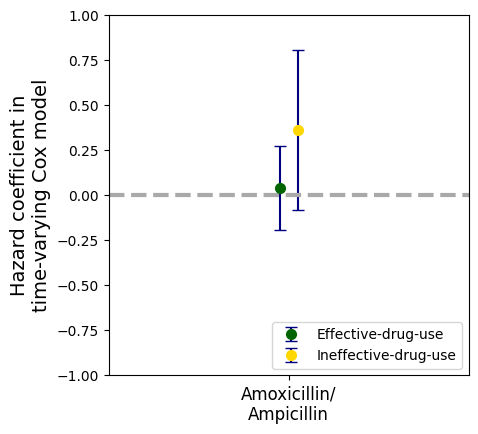

In [53]:
# -------------------------------------PLOTTING-------------------------------------
fig = plt.figure(figsize=(4,4))
# Add axes: [left, bottom, width, height]
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])

for i in range(len(cox_list[0:1])):
      if cox_list[i]=='none':
          continue
      summary_df = cox_list2[i].summary[['coef', 'coef lower 95%', 'coef upper 95%']]  # Choose columns
      summary_df = summary_df.loc[['Drug_use', 'Ineff_Drug_use']]

      ax.errorbar(i-0.05, summary_df['coef']['Drug_use'],
                yerr=[summary_df['coef']['Drug_use'] - summary_df['coef lower 95%']['Drug_use']],
                fmt='o', color='darkgreen', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)
      ax.errorbar(i+0.05, summary_df['coef']['Ineff_Drug_use'],
                yerr=[summary_df['coef']['Ineff_Drug_use'] - summary_df['coef lower 95%']['Ineff_Drug_use']],
                fmt='o', color='gold', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)

ax.legend(['Effective-drug-use', 'Ineffective-drug-use'], loc=4)
ax.set_xticks(np.arange(len(cox_list[0:1])))
ax.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax.set_xticklabels(['Amoxicillin/\nAmpicillin'],
                   fontsize=12, color='black')
ax.set_ylabel('Hazard coefficient in\ntime-varying Cox model', fontsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.savefig('figs5b.svg', transparent=True)
plt.show()

#### Effect of resistance on clearance and establishment

Figure S6a: Does resistance on focal strain affect clearance rate?

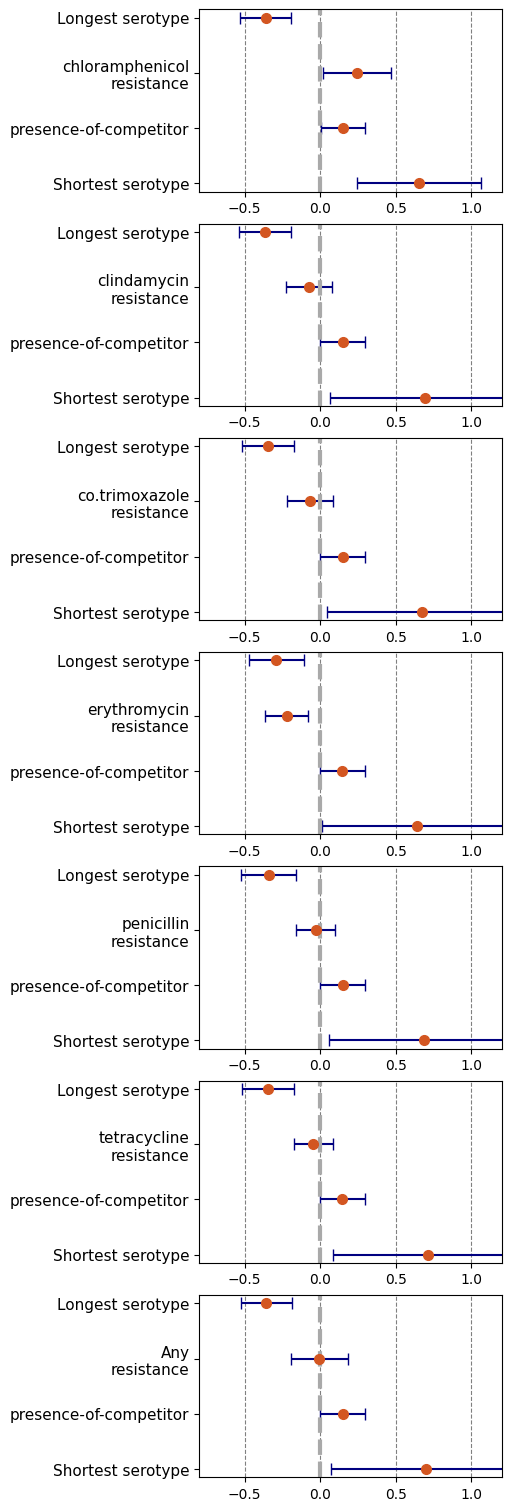

In [121]:
# drug_list = ['chloramphenicol', 'clindamycin', 'co.trimoxazole', 'erythromycin', 'penicillin', 'tetracycline', 'Any']
# # We do not use ceftriaxone since there are only two carriages with this resistance
# sur_list = []

# for drug in drug_list:
#     s5a = clear.focal_res_on_survival(full_data, cocarriage_events, drug, interaction=0)
#     sur_list.append(s5a)

# -------------------------------------PLOTTING-------------------------------------
fig, axs = plt.subplots(7, figsize=(5, 15), constrained_layout=1)

for i in range(7):
    ax = axs[i]
    covariates_to_plot = [sur_list[i].params_.sort_values().index[-1], 'Co_carried', 'foc_res', sur_list[i].params_.sort_values().index[0]]
    y_labels = ['Shortest serotype', 'presence-of-competitor', drug_list[i]+'\nresistance', 'Longest serotype']
    ax.set_yticks(np.arange(len(y_labels)))
    ax.set_yticklabels(y_labels, fontsize=11, color='black')

    summary_df = sur_list[i].summary.loc[covariates_to_plot]
    ax.errorbar(summary_df['coef'], np.arange(len(y_labels)),
                xerr=[summary_df['coef'] - summary_df['coef lower 95%'],
                      summary_df['coef upper 95%'] - summary_df['coef']],
                fmt='o', color=[211/255, 86/255, 33/255], markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)

    # Plotting a horizontal line at x=0
    ax.axvline(x=0, ls='--', color='darkgrey', linewidth=3)
    ax.grid(axis='x', linestyle='--', color='grey')
    ax.set_xlim(-0.8, 1.2)

plt.savefig('figs6a.svg', transparent=True)
plt.show()

Figure s6b: Does resistance on focal strain affect competition for clearance?

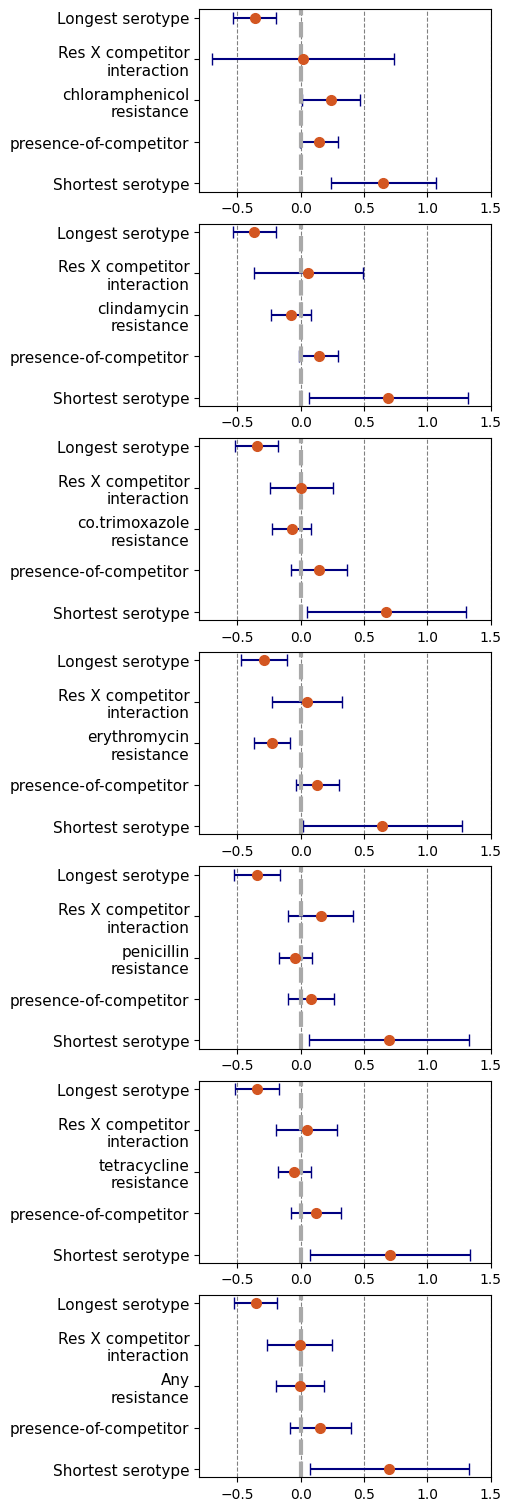

In [120]:
# drug_list = ['chloramphenicol', 'clindamycin', 'co.trimoxazole', 'erythromycin', 'penicillin', 'tetracycline', 'Any']
# # We do not use ceftriaxone since there are only two carriages with this resistance
# sur_list2 = []

# for drug in drug_list:
#     s5b = clear.focal_res_on_survival(full_data, cocarriage_events, drug, interaction=1)
#     sur_list2.append(s5b)

# -------------------------------------PLOTTING-------------------------------------
fig, axs = plt.subplots(7, figsize=(5, 15), constrained_layout=1)

for i in range(7):
    ax = axs[i]
    covariates_to_plot = [sur_list2[i].params_.sort_values().index[-1], 'Co_carried', 'foc_res', 'foc_res:Co_carried', sur_list2[i].params_.sort_values().index[0]]
    y_labels = ['Shortest serotype', 'presence-of-competitor', drug_list[i]+'\nresistance', 'Res X competitor\ninteraction', 'Longest serotype']
    ax.set_yticks(np.arange(len(y_labels)))
    ax.set_yticklabels(y_labels, fontsize=11, color='black')

    summary_df = sur_list2[i].summary.loc[covariates_to_plot]
    ax.errorbar(summary_df['coef'], np.arange(len(y_labels)),
                xerr=[summary_df['coef'] - summary_df['coef lower 95%'],
                      summary_df['coef upper 95%'] - summary_df['coef']],
                fmt='o', color=[211/255, 86/255, 33/255], markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)

    # Plotting a horizontal line at x=0
    ax.axvline(x=0, ls='--', color='darkgrey', linewidth=3)
    ax.grid(axis='x', linestyle='--', color='grey')
    ax.set_xlim(-0.8, 1.5)

plt.savefig('figs6b.svg', transparent=True)
plt.show()

Figure S6c: Does resistance of co-coloniser affect your clearance rate?

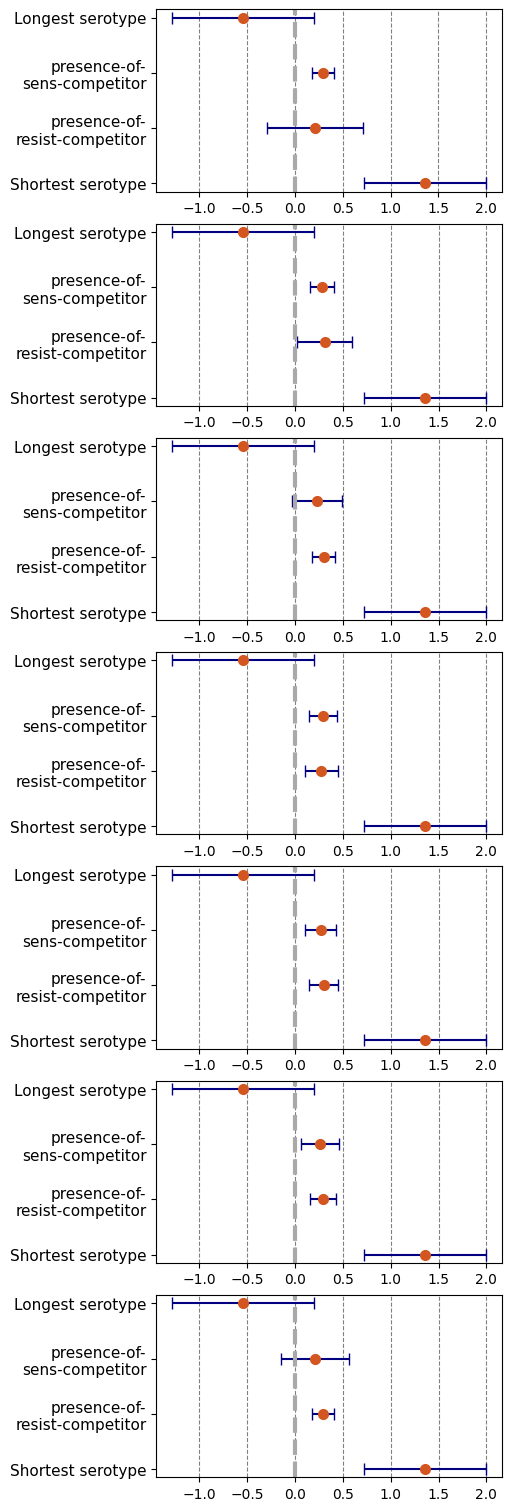

In [119]:
# drug_list = ['chloramphenicol', 'clindamycin', 'co.trimoxazole', 'erythromycin', 'penicillin', 'tetracycline', 'Any']
# # We do not use ceftriaxone since there are only two carriages with this resistance
# sur_list3 = []

# for drug in drug_list:
#     s5c = clear.cocol_res_on_survival(full_data, cocarriage_events, drug)
#     sur_list3.append(s5c)

# -------------------------------------PLOTTING-------------------------------------
fig, axs = plt.subplots(7, figsize=(5, 15), constrained_layout=1)

for i in range(7):
    ax = axs[i]
    covariates_to_plot = [sur_list3[i].params_.sort_values().index[-1], 'CC_Res', 'CC_Sen', sur_list3[i].params_.sort_values().index[0]]
    y_labels = ['Shortest serotype', 'presence-of-\nresist-competitor', 'presence-of-\nsens-competitor', 'Longest serotype']
    ax.set_yticks(np.arange(len(y_labels)))
    ax.set_yticklabels(y_labels, fontsize=11, color='black')

    summary_df = sur_list3[i].summary.loc[covariates_to_plot]
    ax.errorbar(summary_df['coef'], np.arange(len(y_labels)),
                xerr=[summary_df['coef'] - summary_df['coef lower 95%'],
                      summary_df['coef upper 95%'] - summary_df['coef']],
                fmt='o', color=[211/255, 86/255, 33/255], markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)

    # Plotting a horizontal line at x=0
    ax.axvline(x=0, ls='--', color='darkgrey', linewidth=3)
    ax.grid(axis='x', linestyle='--', color='grey')

plt.savefig('figs6c.svg', transparent=True)
plt.show()

Figure S7: Does resistance of resident strain affect establishment rate of incoming strain?

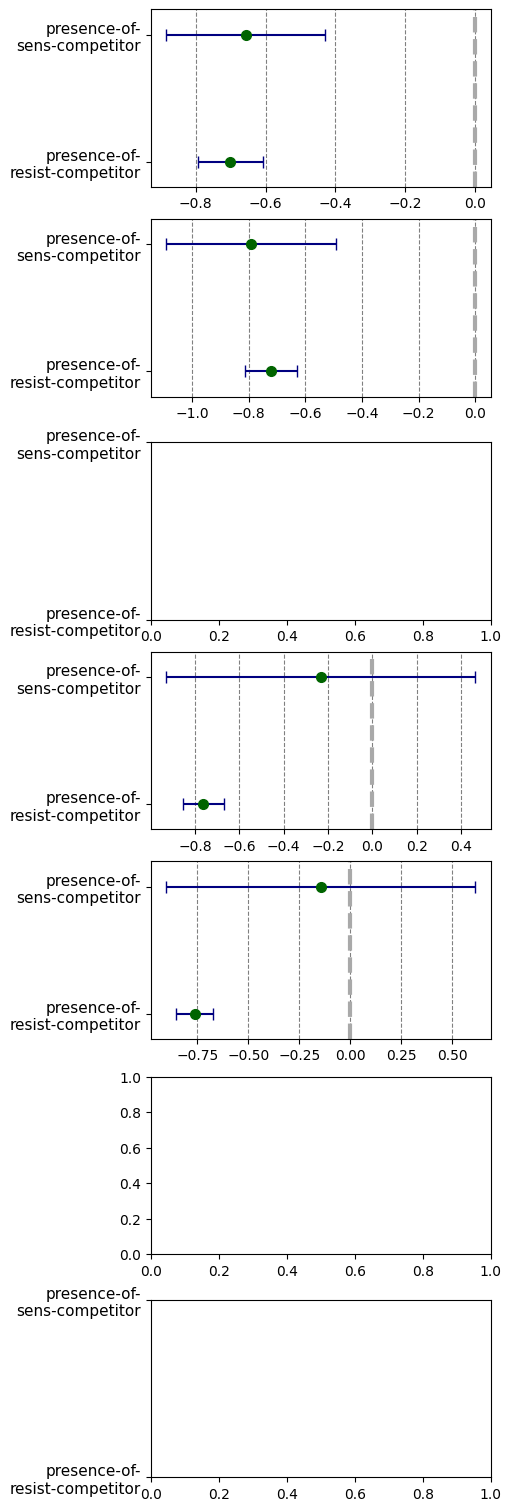

In [135]:
# drug_list = ['chloramphenicol', 'clindamycin', 'co.trimoxazole', 'erythromycin', 'penicillin', 'tetracycline', 'Any']
# # We do not use ceftriaxone since there are only two carriages with this resistance.
# # Some dont converge due to low variance.
# sur_list4 = []

# for drug in drug_list:
#     try:
#         s5d = est.estab_survival_resident_resist(establishment_df, estab_host_carriages_df, drug)
#     except:
#         s5d = 0
#     sur_list4.append(s5d)

# -------------------------------------PLOTTING-------------------------------------
fig, axs = plt.subplots(7, figsize=(5, 15), constrained_layout=1)

for i in range(7):
    if i==5:
        continue
    ax = axs[i]
    covariates_to_plot = ['CC_Res', 'CC_Sen']
    y_labels = ['presence-of-\nresist-competitor', 'presence-of-\nsens-competitor']
    ax.set_yticks(np.arange(len(y_labels)))
    ax.set_yticklabels(y_labels, fontsize=11, color='black')
    try:
        summary_df = sur_list4[i].summary.loc[covariates_to_plot]
        ax.errorbar(summary_df['coef'], np.arange(len(y_labels)),
                    xerr=[summary_df['coef'] - summary_df['coef lower 95%'],
                        summary_df['coef upper 95%'] - summary_df['coef']],
                    fmt='o', color='darkgreen', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)
    except:
        continue
    # Plotting a horizontal line at x=0
    ax.set_ylim(-0.2, len(y_labels) - 1 + 0.2)
    ax.axvline(x=0, ls='--', color='darkgrey', linewidth=3)
    ax.grid(axis='x', linestyle='--', color='grey')

plt.savefig('figs7.svg', transparent=True)
plt.show()

#### Section S7E: Drug corrected Cost of resistance during establishment-competition

In [ ]:
# Do I need to do this?

#### Figure S8: Resistance-without-drug - separated by resistance

In [199]:
resistances = ['penicillin', 'ERYTHROMYCIN', 'CLINDAMYCIN']
cox_list_res = []

# For each of these drugs, I create drug dataframes, and do the analysis 5.2

for d in resistances:
    eff_df = DATAds.effective_drug_separated(full_data, illness_df, treat_length=7,
                            drug=d)
    ineff_df, rwd = DATAds.ineffective_drug_separated(full_data, illness_df, treat_length=7,
                               drug=d)
    try:
        cph = clear.cost_of_resistance(full_data, cocarriage_events, rwd,
                       eff_df, ineff_df, interaction=1)
        cox_list_res.append(cph)
    except:
        cox_list_res.append('none')


Iteration 1: norm_delta = 3.98e-01, step_size = 0.9500, log_lik = -31313.46095, newton_decrement = 3.22e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 6.43e-02, step_size = 0.9500, log_lik = -31048.47168, newton_decrement = 2.04e+01, seconds_since_start = 0.7
Iteration 3: norm_delta = 1.78e-02, step_size = 0.9500, log_lik = -31026.34969, newton_decrement = 1.23e+00, seconds_since_start = 0.9
Iteration 4: norm_delta = 3.35e-03, step_size = 1.0000, log_lik = -31025.06273, newton_decrement = 2.75e-02, seconds_since_start = 1.2
Iteration 5: norm_delta = 1.43e-04, step_size = 1.0000, log_lik = -31025.03469, newton_decrement = 3.33e-05, seconds_since_start = 1.6
Iteration 6: norm_delta = 4.32e-07, step_size = 1.0000, log_lik = -31025.03466, newton_decrement = 2.78e-10, seconds_since_start = 2.4
Convergence completed after 6 iterations.
Iteration 1: norm_delta = 3.65e-01, step_size = 0.9500, log_lik = -31077.01386, newton_decrement = 2.83e+02, seconds_since_start = 0.3
Iteration 2: 

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Ineff_Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Ineff_Drug_use'].var())
>>> print(df.loc[~events, 'Ineff_Drug_use'].var())

A very low variance means that the column Ineff_Drug_use completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


Iteration 1: norm_delta = 3.66e-01, step_size = 0.9500, log_lik = -30982.29890, newton_decrement = 2.81e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 6.91e-02, step_size = 0.9500, log_lik = -30759.43489, newton_decrement = 2.28e+01, seconds_since_start = 0.7
Iteration 3: norm_delta = 2.03e-02, step_size = 0.9500, log_lik = -30734.57505, newton_decrement = 1.44e+00, seconds_since_start = 1.3
Iteration 4: norm_delta = 3.41e-03, step_size = 1.0000, log_lik = -30733.07459, newton_decrement = 2.80e-02, seconds_since_start = 1.6
Iteration 5: norm_delta = 8.96e-05, step_size = 1.0000, log_lik = -30733.04628, newton_decrement = 1.33e-05, seconds_since_start = 1.9
Iteration 6: norm_delta = 1.21e-07, step_size = 1.0000, log_lik = -30733.04627, newton_decrement = 1.85e-11, seconds_since_start = 2.2
Convergence completed after 6 iterations.


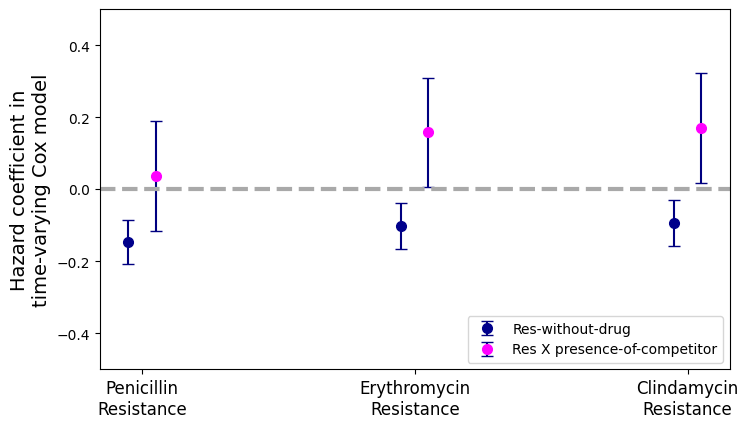

In [207]:
# -------------------------------------PLOTTING-------------------------------------
fig = plt.figure(figsize=(7,4))
# Add axes: [left, bottom, width, height]
ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])

for i in range(len(cox_list_res[0:3])):
      summary_df = cox_list_res[i].summary[['coef', 'coef lower 95%', 'coef upper 95%']]  # Choose columns
      summary_df = summary_df.loc[['D_minus', 'D_minus:Co_carried']]

      ax.errorbar(i-0.05, summary_df['coef']['D_minus'],
                yerr=[summary_df['coef']['D_minus'] - summary_df['coef lower 95%']['D_minus']],
                fmt='o', color='darkblue', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)
      ax.errorbar(i+0.05, summary_df['coef']['D_minus:Co_carried'],
                yerr=[summary_df['coef']['D_minus:Co_carried'] - summary_df['coef lower 95%']['D_minus:Co_carried']],
                fmt='o', color='magenta', markersize=7, capsize=4, ecolor='navy', elinewidth=1.5)

ax.legend(['Res-without-drug', 'Res X presence-of-competitor'], loc=4)
ax.set_xticks(np.arange(len(cox_list_res[0:3])))
ax.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax.set_xticklabels(['Penicillin\nResistance', 'Erythromycin\nResistance', 'Clindamycin\nResistance'],
                   fontsize=12, color='black', rotation=0)
ax.set_ylabel('Hazard coefficient in\ntime-varying Cox model', fontsize=14)
ax.set_ylim(-0.5,0.5)
plt.savefig('figs8.svg', transparent=True) 
plt.show()

#### Section S9: Assumption about drug-use duration

In [5]:
# Save the drug-use dataframes

effective_df_list, ineffective_df_list, Dminus_list = [], [], []
drug_duration = [5, 7, 10, 15]   # Number of days the drug is supposed to be effective

for d_len in drug_duration:
    effective_df_list.append(DATA.effective_drug_plus_res(full_data, illness_df, treat_length=d_len))   # Effective drug use in Lifelines format
    ineff_df, res_df = DATA.ineffective_drugs(full_data, illness_df, treat_length=d_len)  # Ineffective drug use and Resistance-without-drug in Lifelines format
    ineffective_df_list.append(ineff_df)
    Dminus_list.append(res_df)


#### Figure S9: Effect of effective and ineffective drug, and resistance (Figure 4 in main text)

In [6]:
mean2, se2 = np.zeros((len(drug_duration), 6)), np.zeros((len(drug_duration), 6))

# Repeating figure 4A
for i in range(len(drug_duration)):
    r7a = clear.effects_of_drugs(full_data, cocarriage_events, effective_df_list[i], ineffective_df_list[i])
    mean2[i, 0], se2[i, 0] = r7a.summary['coef']['Drug_use'], r7a.summary['se(coef)']['Drug_use']
    mean2[i, 1], se2[i, 1] = r7a.summary['coef']['Ineff_Drug_use'], r7a.summary['se(coef)']['Ineff_Drug_use']

# Repeating figure 4B 
for i in range(len(drug_duration)):
    e_effective_drug_df, e_ineffective_drug_df, e_res_without_drug = est.get_est_drug_res_info(establishment_df,
                                                                                               full_data, illness_df,
                                                                                               treat_length=drug_duration[i])
    r7a = est.estab_survival_res_and_drugs(establishment_df, estab_host_carriages_df, e_effective_drug_df,
                                           e_ineffective_drug_df)
    mean2[i, 2], se2[i, 2] = r7a.summary['coef']['Drug_use'], r7a.summary['se(coef)']['Drug_use']
    mean2[i, 3], se2[i, 3] = r7a.summary['coef']['Ineff_Drug_use'], r7a.summary['se(coef)']['Ineff_Drug_use']
    
# Repeating figure 4C
for i in range(len(drug_duration)):
    r7a = clear.cost_of_resistance(full_data, cocarriage_events, Dminus_list[i],
                                   effective_df_list[i], ineffective_df_list[i], interaction=0)
    mean2[i, 4], se2[i, 4] = r7a.summary['coef']['D_minus'], r7a.summary['se(coef)']['D_minus']

# Repeating figure 4C
for i in range(len(drug_duration)):
    r7a = clear.cost_of_resistance(full_data, cocarriage_events, Dminus_list[i],
                                   effective_df_list[i], ineffective_df_list[i], interaction=1)
    mean2[i, 5], se2[i, 5] = r7a.summary['coef']['D_minus:Co_carried'], r7a.summary['se(coef)']['D_minus:Co_carried']
    

Iteration 1: norm_delta = 3.85e-01, step_size = 0.9500, log_lik = -31334.80648, newton_decrement = 2.97e+02, seconds_since_start = 0.4
Iteration 2: norm_delta = 5.99e-02, step_size = 0.9500, log_lik = -31089.82518, newton_decrement = 1.82e+01, seconds_since_start = 1.2
Iteration 3: norm_delta = 1.56e-02, step_size = 0.9500, log_lik = -31070.06629, newton_decrement = 1.02e+00, seconds_since_start = 1.9
Iteration 4: norm_delta = 2.30e-03, step_size = 1.0000, log_lik = -31069.00362, newton_decrement = 1.76e-02, seconds_since_start = 2.6
Iteration 5: norm_delta = 3.90e-05, step_size = 1.0000, log_lik = -31068.98583, newton_decrement = 5.05e-06, seconds_since_start = 3.5
Iteration 6: norm_delta = 1.49e-08, step_size = 1.0000, log_lik = -31068.98582, newton_decrement = 7.72e-13, seconds_since_start = 4.4
Convergence completed after 6 iterations.
Iteration 1: norm_delta = 4.05e-01, step_size = 0.9500, log_lik = -31313.46095, newton_decrement = 3.16e+02, seconds_since_start = 0.3
Iteration 2: 

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.23e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 9.81e+01, seconds_since_start = 0.4
Iteration 2: norm_delta = 4.35e-03, step_size = 0.9500, log_lik = -6661.17200, newton_decrement = 1.94e-02, seconds_since_start = 0.7
Iteration 3: norm_delta = 2.18e-04, step_size = 0.9500, log_lik = -6661.15263, newton_decrement = 4.87e-05, seconds_since_start = 1.0
Iteration 4: norm_delta = 1.15e-05, step_size = 1.0000, log_lik = -6661.15258, newton_decrement = 1.22e-07, seconds_since_start = 1.3
Iteration 5: norm_delta = 7.42e-12, step_size = 1.0000, log_lik = -6661.15258, newton_decrement = 1.46e-20, seconds_since_start = 1.5
Convergence completed after 5 iterations.


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.28e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 9.91e+01, seconds_since_start = 0.3
Iteration 2: norm_delta = 7.18e-03, step_size = 0.9500, log_lik = -6660.30477, newton_decrement = 3.09e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 4.17e-04, step_size = 0.9500, log_lik = -6660.27391, newton_decrement = 9.17e-05, seconds_since_start = 1.0
Iteration 4: norm_delta = 2.22e-05, step_size = 1.0000, log_lik = -6660.27382, newton_decrement = 2.32e-07, seconds_since_start = 1.3
Iteration 5: norm_delta = 7.12e-10, step_size = 1.0000, log_lik = -6660.27382, newton_decrement = 1.52e-16, seconds_since_start = 1.6
Convergence completed after 5 iterations.


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.28e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 9.92e+01, seconds_since_start = 0.3
Iteration 2: norm_delta = 6.67e-03, step_size = 0.9500, log_lik = -6660.18069, newton_decrement = 3.03e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 3.79e-04, step_size = 0.9500, log_lik = -6660.15037, newton_decrement = 8.84e-05, seconds_since_start = 0.9
Iteration 4: norm_delta = 2.01e-05, step_size = 1.0000, log_lik = -6660.15029, newton_decrement = 2.24e-07, seconds_since_start = 1.2
Iteration 5: norm_delta = 5.67e-10, step_size = 1.0000, log_lik = -6660.15029, newton_decrement = 1.17e-16, seconds_since_start = 1.5
Convergence completed after 5 iterations.


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.42e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.02e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 7.37e-03, step_size = 0.9500, log_lik = -6657.41302, newton_decrement = 3.71e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 4.37e-04, step_size = 0.9500, log_lik = -6657.37590, newton_decrement = 1.18e-04, seconds_since_start = 0.9
Iteration 4: norm_delta = 2.33e-05, step_size = 1.0000, log_lik = -6657.37578, newton_decrement = 3.00e-07, seconds_since_start = 1.2
Iteration 5: norm_delta = 8.73e-10, step_size = 1.0000, log_lik = -6657.37578, newton_decrement = 3.26e-16, seconds_since_start = 1.6
Convergence completed after 5 iterations.
Iteration 1: norm_delta = 3.83e-01, step_size = 0.9500, log_lik = -31334.80648, newton_decrement = 3.06e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 6.01e-02, step_size = 0.9500, log_lik = -31080.13923, newton_decrement = 1.85e+01, seconds_since_start = 0.7
Iteration 3: norm_

#### Sensitivity of resistance costs drug-separated

In [16]:
resistances = ['penicillin', 'ERYTHROMYCIN', 'CLINDAMYCIN']
drug_duration = [5, 7, 10, 15]
mean3, se3 = np.zeros((len(drug_duration), 6)), np.zeros((len(drug_duration), 6))

i=0
for d_len in drug_duration:
    j = 0
    for dr in resistances:
        eff_df = DATAds.effective_drug_separated(full_data, illness_df, treat_length=d_len,
                                drug=dr)
        ineff_df, rwd = DATAds.ineffective_drug_separated(full_data, illness_df, treat_length=d_len,
                                drug=dr)
        cph = clear.cost_of_resistance(full_data, cocarriage_events, rwd,
                    eff_df, ineff_df, interaction=1)
        mean3[i, j], se3[i, j] = cph.summary['coef']['D_minus:Co_carried'], cph.summary['se(coef)']['D_minus:Co_carried']
        j = j+1
        
        e_effective, e_ineff, e_res_by_drug = DATAds.est_drug_res_info_drug_separated(establishment_df,
                                    full_data, illness_df, treat_length=d_len,
                                    drug=dr)
        cph = est.estab_withinhostcost_resistance(establishment_df, estab_host_carriages_df,
                                          e_effective, e_ineff, e_res_by_drug)
        mean3[i, j], se3[i, j] = cph.summary['coef']['D_minus:Host_carry'], cph.summary['se(coef)']['D_minus:Host_carry']
        j = j+1
    i = i+1


Iteration 1: norm_delta = 3.77e-01, step_size = 0.9500, log_lik = -31334.80648, newton_decrement = 3.02e+02, seconds_since_start = 1.5
Iteration 2: norm_delta = 6.11e-02, step_size = 0.9500, log_lik = -31084.65454, newton_decrement = 1.88e+01, seconds_since_start = 3.0
Iteration 3: norm_delta = 1.59e-02, step_size = 0.9500, log_lik = -31064.27386, newton_decrement = 1.05e+00, seconds_since_start = 4.8
Iteration 4: norm_delta = 2.32e-03, step_size = 1.0000, log_lik = -31063.18506, newton_decrement = 1.79e-02, seconds_since_start = 8.4
Iteration 5: norm_delta = 3.90e-05, step_size = 1.0000, log_lik = -31063.16700, newton_decrement = 5.11e-06, seconds_since_start = 11.8
Iteration 6: norm_delta = 1.51e-08, step_size = 1.0000, log_lik = -31063.16699, newton_decrement = 8.14e-13, seconds_since_start = 15.0
Convergence completed after 6 iterations.


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.21e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 9.89e+01, seconds_since_start = 0.3
Iteration 2: norm_delta = 7.74e-03, step_size = 0.9500, log_lik = -6660.46035, newton_decrement = 4.79e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 4.16e-04, step_size = 0.9500, log_lik = -6660.41251, newton_decrement = 1.30e-04, seconds_since_start = 0.9
Iteration 4: norm_delta = 2.20e-05, step_size = 1.0000, log_lik = -6660.41238, newton_decrement = 3.27e-07, seconds_since_start = 1.2
Iteration 5: norm_delta = 2.95e-10, step_size = 1.0000, log_lik = -6660.41238, newton_decrement = 2.54e-17, seconds_since_start = 1.5
Convergence completed after 5 iterations.
Iteration 1: norm_delta = 3.63e-01, step_size = 0.9500, log_lik = -31077.01386, newton_decrement = 2.82e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 6.74e-02, step_size = 0.9500, log_lik = -30852.07984, newton_decrement = 2.20e+01, seconds_since_start = 0.4
Iteration 3: norm_

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_us

Iteration 1: norm_delta = 3.94e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.04e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 1.70e-02, step_size = 0.9500, log_lik = -6656.24062, newton_decrement = 9.14e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 1.43e-03, step_size = 0.9500, log_lik = -6656.14884, newton_decrement = 3.82e-04, seconds_since_start = 0.8
Iteration 4: norm_delta = 8.32e-05, step_size = 1.0000, log_lik = -6656.14845, newton_decrement = 1.07e-06, seconds_since_start = 1.1
Iteration 5: norm_delta = 3.01e-08, step_size = 1.0000, log_lik = -6656.14845, newton_decrement = 8.01e-14, seconds_since_start = 1.4
Convergence completed after 5 iterations.
Iteration 1: norm_delta = 3.68e-01, step_size = 0.9500, log_lik = -30982.29890, newton_decrement = 2.82e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 6.89e-02, step_size = 0.9500, log_lik = -30757.60565, newton_decrement = 2.24e+01, seconds_since_start = 0.4
Iteration 3: norm_

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_us

Iteration 1: norm_delta = 3.90e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.03e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 1.20e-02, step_size = 0.9500, log_lik = -6656.65047, newton_decrement = 7.30e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 6.82e-04, step_size = 0.9500, log_lik = -6656.57751, newton_decrement = 2.17e-04, seconds_since_start = 0.8
Iteration 4: norm_delta = 3.62e-05, step_size = 1.0000, log_lik = -6656.57730, newton_decrement = 5.47e-07, seconds_since_start = 1.1
Iteration 5: norm_delta = 7.43e-10, step_size = 1.0000, log_lik = -6656.57730, newton_decrement = 1.40e-16, seconds_since_start = 1.4
Convergence completed after 5 iterations.
Iteration 1: norm_delta = 3.98e-01, step_size = 0.9500, log_lik = -31313.46095, newton_decrement = 3.22e+02, seconds_since_start = 1.5
Iteration 2: norm_delta = 6.43e-02, step_size = 0.9500, log_lik = -31048.47168, newton_decrement = 2.04e+01, seconds_since_start = 4.9
Iteration 3: norm_

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.24e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 9.99e+01, seconds_since_start = 0.3
Iteration 2: norm_delta = 8.53e-03, step_size = 0.9500, log_lik = -6659.55499, newton_decrement = 5.82e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 4.52e-04, step_size = 0.9500, log_lik = -6659.49691, newton_decrement = 1.55e-04, seconds_since_start = 0.9
Iteration 4: norm_delta = 2.39e-05, step_size = 1.0000, log_lik = -6659.49676, newton_decrement = 3.88e-07, seconds_since_start = 1.2
Iteration 5: norm_delta = 3.02e-10, step_size = 1.0000, log_lik = -6659.49676, newton_decrement = 2.52e-17, seconds_since_start = 1.4
Convergence completed after 5 iterations.
Iteration 1: norm_delta = 3.65e-01, step_size = 0.9500, log_lik = -31077.01386, newton_decrement = 2.83e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 6.75e-02, step_size = 0.9500, log_lik = -30851.03478, newton_decrement = 2.21e+01, seconds_since_start = 0.4
Iteration 3: norm_

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_us

Iteration 1: norm_delta = 3.96e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.04e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 1.89e-02, step_size = 0.9500, log_lik = -6656.02478, newton_decrement = 9.92e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 1.77e-03, step_size = 0.9500, log_lik = -6655.92490, newton_decrement = 4.97e-04, seconds_since_start = 0.9
Iteration 4: norm_delta = 1.07e-04, step_size = 1.0000, log_lik = -6655.92440, newton_decrement = 1.49e-06, seconds_since_start = 1.2
Iteration 5: norm_delta = 5.41e-08, step_size = 1.0000, log_lik = -6655.92440, newton_decrement = 2.67e-13, seconds_since_start = 1.5
Convergence completed after 5 iterations.
Iteration 1: norm_delta = 3.67e-01, step_size = 0.9500, log_lik = -30982.29890, newton_decrement = 2.82e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 6.87e-02, step_size = 0.9500, log_lik = -30757.91226, newton_decrement = 2.24e+01, seconds_since_start = 0.5
Iteration 3: norm_

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_us

Iteration 1: norm_delta = 3.91e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.03e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 1.22e-02, step_size = 0.9500, log_lik = -6656.63359, newton_decrement = 7.31e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 6.87e-04, step_size = 0.9500, log_lik = -6656.56050, newton_decrement = 2.17e-04, seconds_since_start = 0.8
Iteration 4: norm_delta = 3.64e-05, step_size = 1.0000, log_lik = -6656.56028, newton_decrement = 5.48e-07, seconds_since_start = 1.1
Iteration 5: norm_delta = 7.43e-10, step_size = 1.0000, log_lik = -6656.56028, newton_decrement = 1.40e-16, seconds_since_start = 1.4
Convergence completed after 5 iterations.
Iteration 1: norm_delta = 4.24e-01, step_size = 0.9500, log_lik = -31450.99587, newton_decrement = 3.56e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 6.92e-02, step_size = 0.9500, log_lik = -31158.81771, newton_decrement = 2.20e+01, seconds_since_start = 0.6
Iteration 3: norm_

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.25e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.00e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 8.77e-03, step_size = 0.9500, log_lik = -6659.30593, newton_decrement = 6.31e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 4.71e-04, step_size = 0.9500, log_lik = -6659.24295, newton_decrement = 1.71e-04, seconds_since_start = 0.9
Iteration 4: norm_delta = 2.49e-05, step_size = 1.0000, log_lik = -6659.24278, newton_decrement = 4.29e-07, seconds_since_start = 1.2
Iteration 5: norm_delta = 3.59e-10, step_size = 1.0000, log_lik = -6659.24278, newton_decrement = 3.71e-17, seconds_since_start = 1.5
Convergence completed after 5 iterations.
Iteration 1: norm_delta = 3.65e-01, step_size = 0.9500, log_lik = -31077.01386, newton_decrement = 2.84e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 6.87e-02, step_size = 0.9500, log_lik = -30851.31195, newton_decrement = 2.27e+01, seconds_since_start = 0.5
Iteration 3: norm_

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_us

Iteration 1: norm_delta = 3.96e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.04e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 2.19e-02, step_size = 0.9500, log_lik = -6656.09586, newton_decrement = 1.02e-01, seconds_since_start = 0.6
Iteration 3: norm_delta = 1.51e-03, step_size = 0.9500, log_lik = -6655.99318, newton_decrement = 3.63e-04, seconds_since_start = 0.8
Iteration 4: norm_delta = 8.16e-05, step_size = 1.0000, log_lik = -6655.99282, newton_decrement = 9.35e-07, seconds_since_start = 1.1
Iteration 5: norm_delta = 6.26e-09, step_size = 1.0000, log_lik = -6655.99282, newton_decrement = 2.64e-15, seconds_since_start = 1.4
Convergence completed after 5 iterations.
Iteration 1: norm_delta = 3.66e-01, step_size = 0.9500, log_lik = -30982.29890, newton_decrement = 2.82e+02, seconds_since_start = 0.7
Iteration 2: norm_delta = 6.91e-02, step_size = 0.9500, log_lik = -30758.26830, newton_decrement = 2.27e+01, seconds_since_start = 1.2
Iteration 3: norm_

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_us

Iteration 1: norm_delta = 4.43e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.08e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 3.62e-01, step_size = 0.9500, log_lik = -6670.90560, newton_decrement = 4.41e+01, seconds_since_start = 0.6
Iteration 3: norm_delta = 6.37e-01, step_size = 0.9500, log_lik = -6663.28246, newton_decrement = 1.67e+01, seconds_since_start = 0.9
Iteration 4: norm_delta = 3.35e+00, step_size = 0.9310, log_lik = -6741.41847, newton_decrement = 4.81e+02, seconds_since_start = 1.1
Iteration 5: norm_delta = 3.09e+00, step_size = 0.9124, log_lik = -7071.91151, newton_decrement = 4.25e+02, seconds_since_start = 1.4
Iteration 6: norm_delta = 5.44e-01, step_size = 0.8941, log_lik = -6674.34417, newton_decrement = 7.28e+01, seconds_since_start = 1.7
Iteration 7: norm_delta = 8.41e-01, step_size = 1.0000, log_lik = -6672.72840, newton_decrement = 2.62e+01, seconds_since_start = 2.0
Iteration 8: norm_delta = 3.56e+00, step_size = 0.9800, log_li

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)


Iteration 1: norm_delta = 4.59e-01, step_size = 0.9500, log_lik = -31458.20212, newton_decrement = 4.04e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 7.78e-02, step_size = 0.9500, log_lik = -31128.87618, newton_decrement = 2.48e+01, seconds_since_start = 0.4
Iteration 3: norm_delta = 1.79e-02, step_size = 0.9500, log_lik = -31102.27918, newton_decrement = 1.27e+00, seconds_since_start = 0.6
Iteration 4: norm_delta = 3.79e-03, step_size = 1.0000, log_lik = -31100.93564, newton_decrement = 4.12e-02, seconds_since_start = 0.9
Iteration 5: norm_delta = 2.70e-04, step_size = 1.0000, log_lik = -31100.89294, newton_decrement = 1.77e-04, seconds_since_start = 1.1
Iteration 6: norm_delta = 1.58e-06, step_size = 1.0000, log_lik = -31100.89277, newton_decrement = 5.99e-09, seconds_since_start = 1.3
Convergence completed after 6 iterations.


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.36e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.03e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 8.91e-03, step_size = 0.9500, log_lik = -6656.98565, newton_decrement = 6.57e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 4.76e-04, step_size = 0.9500, log_lik = -6656.92007, newton_decrement = 1.77e-04, seconds_since_start = 1.4
Iteration 4: norm_delta = 2.52e-05, step_size = 1.0000, log_lik = -6656.91990, newton_decrement = 4.44e-07, seconds_since_start = 1.7
Iteration 5: norm_delta = 3.64e-10, step_size = 1.0000, log_lik = -6656.91990, newton_decrement = 3.75e-17, seconds_since_start = 2.0
Convergence completed after 5 iterations.
Iteration 1: norm_delta = 3.63e-01, step_size = 0.9500, log_lik = -31077.01386, newton_decrement = 2.83e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 6.85e-02, step_size = 0.9500, log_lik = -30851.72658, newton_decrement = 2.25e+01, seconds_since_start = 0.5
Iteration 3: norm_

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay
/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column Drug_use have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['observed'].astype(bool)
>>> print(df.loc[events, 'Drug_use'].var())
>>> print(df.loc[~events, 'Drug_us

Iteration 1: norm_delta = 3.98e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.04e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 2.51e-02, step_size = 0.9500, log_lik = -6655.87066, newton_decrement = 1.15e-01, seconds_since_start = 0.6
Iteration 3: norm_delta = 1.92e-03, step_size = 0.9500, log_lik = -6655.75490, newton_decrement = 4.73e-04, seconds_since_start = 0.8
Iteration 4: norm_delta = 1.05e-04, step_size = 1.0000, log_lik = -6655.75442, newton_decrement = 1.24e-06, seconds_since_start = 1.1
Iteration 5: norm_delta = 1.24e-08, step_size = 1.0000, log_lik = -6655.75442, newton_decrement = 1.04e-14, seconds_since_start = 1.4
Convergence completed after 5 iterations.
Iteration 1: norm_delta = 3.63e-01, step_size = 0.9500, log_lik = -30982.29890, newton_decrement = 2.81e+02, seconds_since_start = 0.2
Iteration 2: norm_delta = 6.80e-02, step_size = 0.9500, log_lik = -30758.19620, newton_decrement = 2.22e+01, seconds_since_start = 0.5
Iteration 3: norm_

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 4.37e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.07e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 2.01e-01, step_size = 0.9500, log_lik = -6668.79736, newton_decrement = 2.65e+01, seconds_since_start = 0.6
Iteration 3: norm_delta = 2.94e-01, step_size = 0.9500, log_lik = -6656.80616, newton_decrement = 5.92e+00, seconds_since_start = 0.8
Iteration 4: norm_delta = 2.39e+00, step_size = 0.9310, log_lik = -6694.73916, newton_decrement = 3.71e+02, seconds_since_start = 1.1
Iteration 5: norm_delta = 2.39e+00, step_size = 0.9124, log_lik = -6901.82440, newton_decrement = 2.56e+02, seconds_since_start = 1.4
Iteration 6: norm_delta = 2.54e+00, step_size = 0.8941, log_lik = -6697.15263, newton_decrement = 4.12e+02, seconds_since_start = 1.7
Iteration 7: norm_delta = 2.42e+00, step_size = 0.8762, log_lik = -6930.17058, newton_decrement = 2.84e+02, seconds_since_start = 2.0
Iteration 8: norm_delta = 1.30e-01, step_size = 0.8587, log_li

/var/folders/gy/f2gltnkx69lf7ymcfvn7mgjw0000gn/T/ipykernel_859/136239371.py:84: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.1, wspace=0.3)


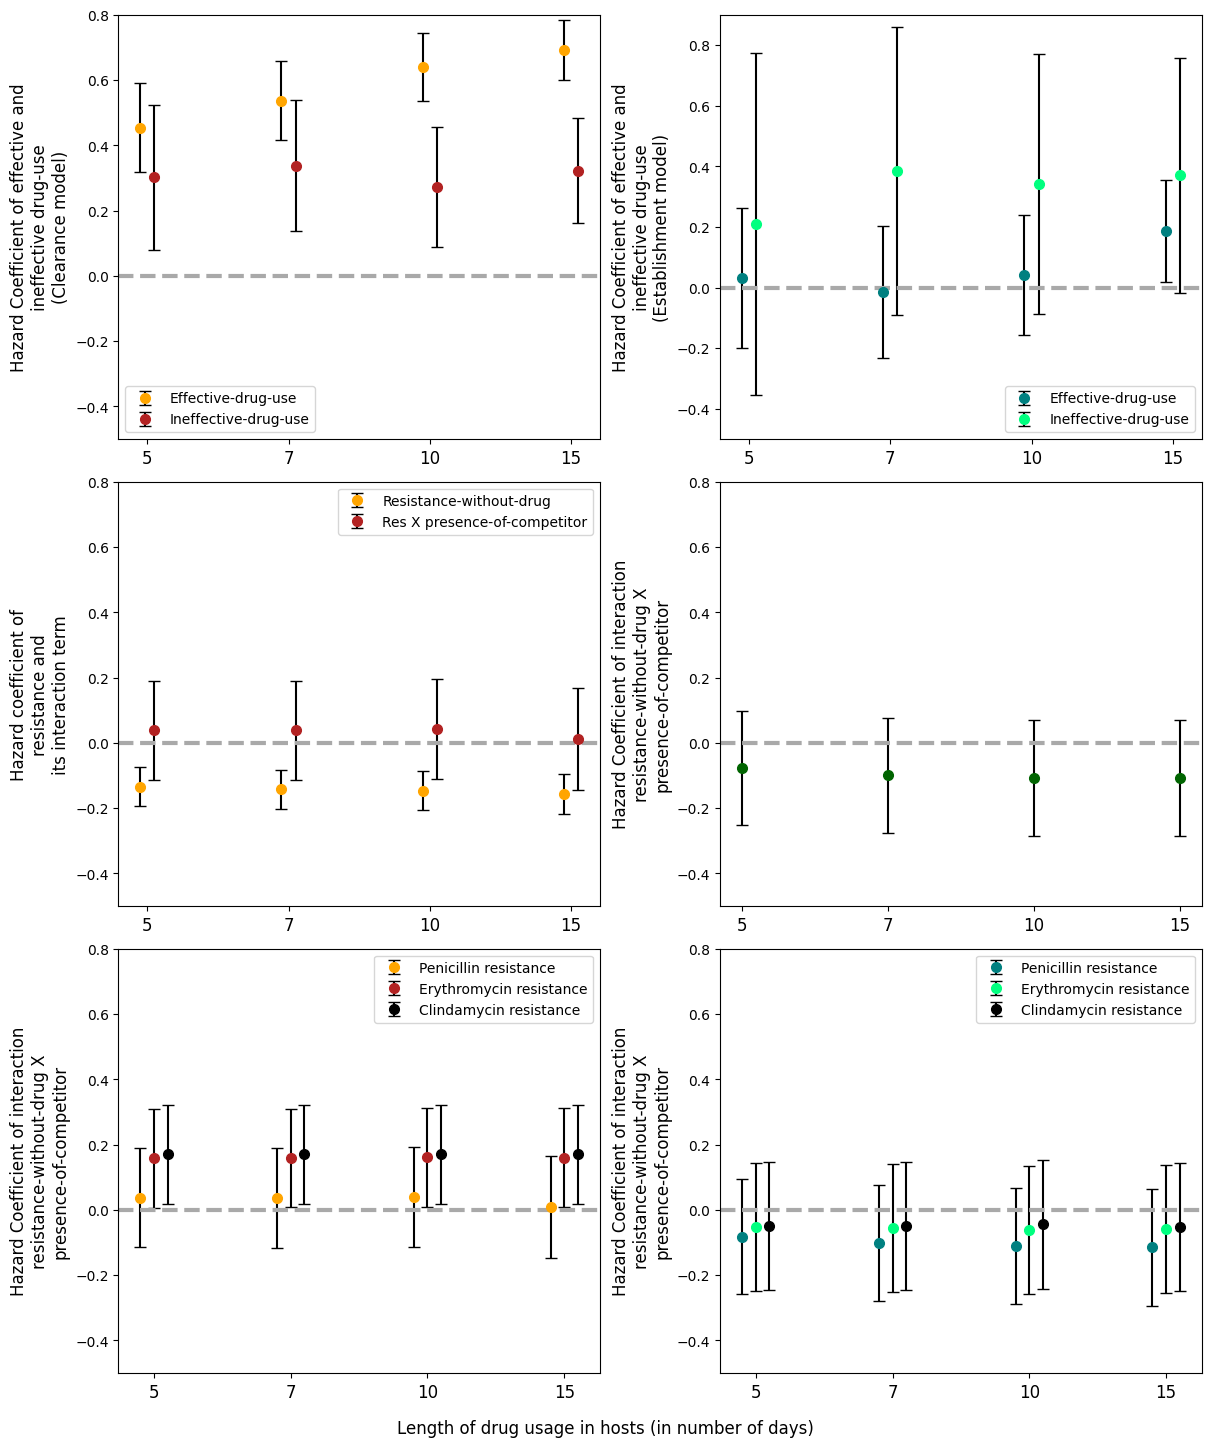

In [72]:
#-------------------------------------------PLOTTING--------------------------------------------------------------------
fig, axs = plt.subplots(3,2, figsize=(12, 14), constrained_layout=1)
x_pos = ['5', '7', '10', '15']

ax = axs[0, 0]
ax.errorbar(np.arange(len(x_pos))-0.05, mean2[0:,0], yerr=1.96*se2[0:,0], label='Effective-drug-use',
            fmt='o', color='orange', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax.errorbar(np.arange(len(x_pos))+0.05, mean2[0:,1], yerr=1.96*se2[0:,1], label='Ineffective-drug-use',
            fmt='o', color='firebrick', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
# Plotting a horizontal line at x=0
ax.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax.set_xticks(np.arange(len(x_pos)))
ax.set_xticklabels(x_pos, fontsize=12, color='black')
ax.set_ylabel('Hazard Coefficient of effective and\nineffective drug-use\n(Clearance model)', fontsize=12)
ax.legend(loc='lower left')
ax.set_ylim(-0.5, 0.8)


ax2 = axs[0,1]
ax2.errorbar(np.arange(len(x_pos))-0.05, mean2[0:,2], yerr=1.96*se2[0:,2], label='Effective-drug-use',
            fmt='o', color='teal', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax2.errorbar(np.arange(len(x_pos))+0.05, mean2[0:,3], yerr=1.96*se2[0:,3], label='Ineffective-drug-use',
            fmt='o', color='springgreen', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax2.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax2.set_xticks(np.arange(len(x_pos)))
ax2.set_xticklabels(x_pos, fontsize=12, color='black')
ax2.set_ylabel('Hazard Coefficient of effective and\nineffective drug-use\n(Establishment model)', fontsize=12)
ax2.legend()
ax2.set_ylim(-0.5, 0.9)

ax3 = axs[1,0]
ax3.errorbar(np.arange(len(x_pos))-0.05, mean2[0:,4], yerr=1.96*se2[0:,4], label='Resistance-without-drug',
            fmt='o', color='orange', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax3.errorbar(np.arange(len(x_pos))+0.05, mean2[0:,5], yerr=1.96*se2[0:,5], label='Res X presence-of-competitor',
            fmt='o', color='firebrick', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax3.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax3.set_xticks(np.arange(len(x_pos)))
ax3.set_xticklabels(x_pos, fontsize=12, color='black')
ax3.set_ylabel('Hazard coefficient of\nresistance and\nits interaction term', fontsize=12)
ax3.set_ylim(-0.5, 0.8)
ax3.legend()

ax4 = axs[1,1]
ax4.errorbar(x_pos, mean4[0:,0], yerr=1.96*se4[0:,0],
            fmt='o', color='darkgreen', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax4.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax4.set_xticks(np.arange(len(x_pos)))
ax4.set_xticklabels(x_pos, fontsize=12, color='black')
ax4.set_ylabel('Hazard Coefficient of interaction\nresistance-without-drug X\npresence-of-competitor', fontsize=12)
ax4.set_ylim(-0.5, 0.8)


ax5 = axs[2,0]
ax5.errorbar(np.arange(len(x_pos))-0.1, mean3[0:,0], yerr=1.96*se3[0:,0], label='Penicillin resistance',
            fmt='o', color='orange', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax5.errorbar(np.arange(len(x_pos))+0.00, mean3[0:,2], yerr=1.96*se3[0:,2], label='Erythromycin resistance',
            fmt='o', color='firebrick', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax5.errorbar(np.arange(len(x_pos))+0.1, mean3[0:,4], yerr=1.96*se3[0:,4], label='Clindamycin resistance',
            fmt='o', color='black', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax5.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax5.set_xticks(np.arange(len(x_pos)))
ax5.set_xticklabels(x_pos, fontsize=12, color='black')
ax5.set_ylabel('Hazard Coefficient of interaction\nresistance-without-drug X\npresence-of-competitor', fontsize=12)
ax5.set_ylim(-0.5, 0.8)
ax5.legend()


ax6 = axs[2,1]
ax6.errorbar(np.arange(len(x_pos))-0.1, mean3[0:,1], yerr=1.96*se3[0:,1], label='Penicillin resistance',
            fmt='o', color='teal', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax6.errorbar(np.arange(len(x_pos))+0.00, mean3[0:,3], yerr=1.96*se3[0:,3], label='Erythromycin resistance',
            fmt='o', color='springgreen', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax6.errorbar(np.arange(len(x_pos))+0.1, mean3[0:,5], yerr=1.96*se3[0:,5], label='Clindamycin resistance',
            fmt='o', color='black', markersize=7, capsize=4, ecolor='black', elinewidth=1.5)
ax6.axhline(y=0, ls='--', color='darkgrey', linewidth=3)
ax6.set_xticks(np.arange(len(x_pos)))
ax6.set_xticklabels(x_pos, fontsize=12, color='black')
ax6.set_ylabel('Hazard Coefficient of interaction\nresistance-without-drug X\npresence-of-competitor', fontsize=12)
ax6.set_ylim(-0.5, 0.8)
ax6.legend()


fig.text(0.5, -0.02, 'Length of drug usage in hosts (in number of days)', ha='center', fontsize=12)
plt.subplots_adjust(hspace=0.1, wspace=0.3)
plt.savefig('figs9.svg', transparent=True)
plt.show()


In [68]:
mean4, se4 = np.zeros((len(drug_duration), 1)), np.zeros((len(drug_duration), 1))

# Repeating figure 4D 
for i in range(len(drug_duration)):
    e_effective_drug_df, e_ineffective_drug_df, e_res_without_drug = est.get_est_drug_res_info(establishment_df,
                                                                                               full_data, illness_df,
                                                                                               treat_length=drug_duration[i])
    r7a = est.estab_withinhostcost_resistance(establishment_df, estab_host_carriages_df,
                                          e_effective_drug_df, e_ineffective_drug_df, e_res_without_drug)
    mean4[i, 0], se4[i, 0] = r7a.summary['coef']['D_minus:Host_carry'], r7a.summary['se(coef)']['D_minus:Host_carry']

/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.16e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 9.86e+01, seconds_since_start = 0.3
Iteration 2: norm_delta = 7.62e-03, step_size = 0.9500, log_lik = -6660.81735, newton_decrement = 4.51e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 4.10e-04, step_size = 0.9500, log_lik = -6660.77233, newton_decrement = 1.23e-04, seconds_since_start = 0.9
Iteration 4: norm_delta = 2.16e-05, step_size = 1.0000, log_lik = -6660.77221, newton_decrement = 3.09e-07, seconds_since_start = 1.2
Iteration 5: norm_delta = 2.78e-10, step_size = 1.0000, log_lik = -6660.77220, newton_decrement = 2.34e-17, seconds_since_start = 1.5
Convergence completed after 5 iterations.


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.20e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 9.98e+01, seconds_since_start = 0.3
Iteration 2: norm_delta = 9.66e-03, step_size = 0.9500, log_lik = -6659.73353, newton_decrement = 6.24e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 5.30e-04, step_size = 0.9500, log_lik = -6659.67118, newton_decrement = 1.72e-04, seconds_since_start = 0.9
Iteration 4: norm_delta = 2.81e-05, step_size = 1.0000, log_lik = -6659.67101, newton_decrement = 4.33e-07, seconds_since_start = 1.2
Iteration 5: norm_delta = 5.25e-10, step_size = 1.0000, log_lik = -6659.67101, newton_decrement = 8.00e-17, seconds_since_start = 1.5
Convergence completed after 5 iterations.


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.20e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.00e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 9.64e-03, step_size = 0.9500, log_lik = -6659.49684, newton_decrement = 6.67e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 5.22e-04, step_size = 0.9500, log_lik = -6659.43021, newton_decrement = 1.82e-04, seconds_since_start = 0.9
Iteration 4: norm_delta = 2.76e-05, step_size = 1.0000, log_lik = -6659.43003, newton_decrement = 4.58e-07, seconds_since_start = 1.2
Iteration 5: norm_delta = 4.27e-10, step_size = 1.0000, log_lik = -6659.43003, newton_decrement = 5.73e-17, seconds_since_start = 1.5
Convergence completed after 5 iterations.


/Users/aswin/polybox - Aswin Krishna (aswin.krishna@env.ethz.ch)@polybox.ethz.ch/Projects/Maela_project/.venv/lib/python3.11/site-packages/lifelines/utils/__init__.py:1462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv[duration_col] += delay


Iteration 1: norm_delta = 3.34e-01, step_size = 0.9500, log_lik = -6754.54796, newton_decrement = 1.03e+02, seconds_since_start = 0.3
Iteration 2: norm_delta = 9.82e-03, step_size = 0.9500, log_lik = -6656.73438, newton_decrement = 6.93e-02, seconds_since_start = 0.6
Iteration 3: norm_delta = 5.39e-04, step_size = 0.9500, log_lik = -6656.66513, newton_decrement = 1.93e-04, seconds_since_start = 0.9
Iteration 4: norm_delta = 2.85e-05, step_size = 1.0000, log_lik = -6656.66494, newton_decrement = 4.86e-07, seconds_since_start = 1.2
Iteration 5: norm_delta = 5.72e-10, step_size = 1.0000, log_lik = -6656.66494, newton_decrement = 1.27e-16, seconds_since_start = 1.5
Convergence completed after 5 iterations.
